# 📊 Exploratory Data Analysis - Sales Forecasting

## Table of Contents
1. [Setup & Data Loading](#1-setup--data-loading)
2. [Data Quality Assessment](#2-data-quality-assessment)
3. [Data Preprocessing & Merging](#3-data-preprocessing--merging)
4. [Temporal Analysis (Trend & Seasonality)](#4-temporal-analysis-trend--seasonality)
5. [Market Analysis](#5-market-analysis)
6. [Product Hierarchy Analysis](#6-product-hierarchy-analysis)
7. [Factory & Brand Analysis](#7-factory--brand-analysis)
8. [Product Lifecycle Analysis](#8-product-lifecycle-analysis)
9. [Missing Data & Zero Sales Analysis](#9-missing-data--zero-sales-analysis)
10. [Correlation & Statistical Analysis](#10-correlation--statistical-analysis)
11. [Key Insights Summary](#11-key-insights-summary)


## 1. Setup & Data Loading


In [192]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime, timedelta
import warnings
from itertools import product as itertools_product

# Statistical libraries
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Custom color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72',
    'tertiary': '#F18F01',
    'quaternary': '#C73E1D',
    'success': '#3A7D44'
}

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [193]:
# Load Data
train = pd.read_csv('data/train.csv')
product_master = pd.read_csv('data/product_master.csv')

print("📁 Data loaded successfully!")
print(f"   Train shape: {train.shape}")
print(f"   Product Master shape: {product_master.shape}")


📁 Data loaded successfully!
   Train shape: (278901, 4)
   Product Master shape: (14351, 10)


## 2. Data Quality Assessment


In [194]:
# 2.1 Basic Information - Train Data
print("=" * 60)
print("TRAIN DATA OVERVIEW")
print("=" * 60)

print("\n📋 First 10 rows:")
display(train.head(10))

print("\n📋 Data Types:")
print(train.dtypes)

print("\n📋 Basic Statistics:")
display(train.describe())

print("\n📋 Unique Values Count:")
for col in train.columns:
    print(f"   {col}: {train[col].nunique():,} unique values")


TRAIN DATA OVERVIEW

📋 First 10 rows:


,market,product_code,date,quantity
0,MKT_001,PRD_0010,2022-01-01,649
1,MKT_001,PRD_0010,2022-02-01,1964
2,MKT_001,PRD_0010,2022-03-01,1505
3,MKT_001,PRD_0010,2022-04-01,1602
4,MKT_001,PRD_0010,2022-05-01,1816
5,MKT_001,PRD_0010,2022-06-01,3339
6,MKT_001,PRD_0010,2022-07-01,784
7,MKT_001,PRD_0010,2022-08-01,1347
8,MKT_001,PRD_0010,2022-09-01,1446
9,MKT_001,PRD_0010,2022-10-01,1240



📋 Data Types:
market          object
product_code    object
date            object
quantity         int64
dtype: object

📋 Basic Statistics:


,quantity
count,278901.00
mean,120.67
std,434.58
min,-8315.00
25%,3.00
50%,19.00
75%,87.00
max,49254.00



📋 Unique Values Count:
   market: 27 unique values
   product_code: 8,705 unique values
   date: 34 unique values
   quantity: 3,662 unique values


In [195]:
# 2.2 Basic Information - Product Master
print("=" * 60)
print("PRODUCT MASTER OVERVIEW")
print("=" * 60)

print("\n📋 First 10 rows:")
display(product_master.head(10))

print("\n📋 Data Types:")
print(product_master.dtypes)

print("\n📋 Basic Statistics:")
display(product_master.describe(include='all'))

print("\n📋 Unique Values Count:")
for col in product_master.columns:
    print(f"   {col}: {product_master[col].nunique():,} unique values")


PRODUCT MASTER OVERVIEW

📋 First 10 rows:


,product_code,category,business_line_code,business_line,sector,structure_code,factory,brand,start_production_date,end_production_date
0,PRD_7747,CAT_01,BLC_01,BL_01,SECTOR_01,STR_01,FACTORY_01,BRAND_01,2022-05-25,2024-03-18
1,PRD_12705,CAT_02,BLC_02,BL_02,SECTOR_02,STR_02,FACTORY_02,BRAND_02,2013-12-17,2016-12-01
2,PRD_13060,CAT_03,BLC_02,BL_02,SECTOR_03,STR_03,FACTORY_03,BRAND_02,NaN,2020-10-05
3,PRD_8689,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2016-03-30,2018-01-26
4,PRD_13150,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2016-03-30,2018-01-26
5,PRD_13151,CAT_04,BLC_02,BL_03,SECTOR_03,STR_04,FACTORY_04,BRAND_02,2016-07-13,2019-02-01
6,PRD_13160,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2018-10-03,2019-01-31
7,PRD_13161,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2018-10-06,2019-01-31
8,PRD_13162,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2018-10-15,2019-01-31
9,PRD_12715,CAT_02,BLC_02,BL_02,SECTOR_02,STR_05,FACTORY_05,BRAND_02,2016-12-07,2020-08-28



📋 Data Types:
product_code             object
category                 object
business_line_code       object
business_line            object
sector                   object
structure_code           object
factory                  object
brand                    object
start_production_date    object
end_production_date      object
dtype: object

📋 Basic Statistics:


,product_code,category,business_line_code,business_line,sector,structure_code,factory,brand,start_production_date,end_production_date
count,14351,14351,14351,14351,14350,14349,14351,14351,14095,7972
unique,14351,50,7,13,8,86,18,14,3485,1196
top,PRD_7747,CAT_12,BLC_03,BL_07,SECTOR_02,STR_03,FACTORY_01,BRAND_03,2020-09-16,2020-08-28
freq,1,3418,7727,5085,5636,1897,6826,6318,120,138



📋 Unique Values Count:
   product_code: 14,351 unique values
   category: 50 unique values
   business_line_code: 7 unique values
   business_line: 13 unique values
   sector: 8 unique values
   structure_code: 86 unique values
   factory: 18 unique values
   brand: 14 unique values
   start_production_date: 3,485 unique values
   end_production_date: 1,196 unique values



📊 Missing Values in Train Data:
   No missing values found! ✅

📊 Missing Values in Product Master:


,Column,Missing Count,Missing %
9,end_production_date,6379,44.45
8,start_production_date,256,1.78
5,structure_code,2,0.01
4,sector,1,0.01


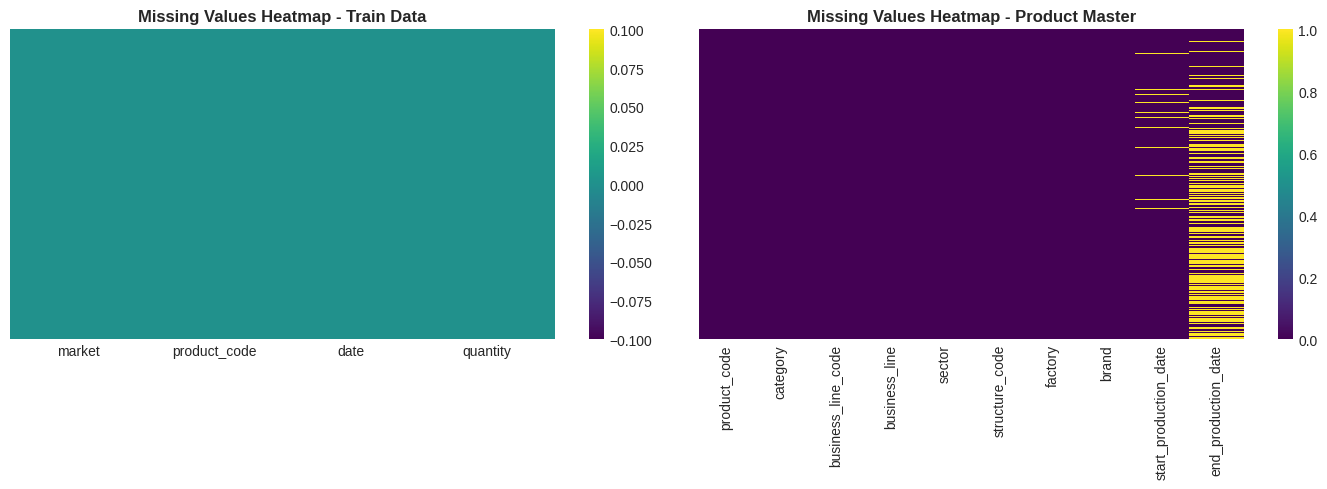

In [196]:
# 2.3 Missing Values Analysis
def missing_values_analysis(df, name):
    """Analyze missing values in a dataframe"""
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing Count': missing.values,
        'Missing %': missing_pct.values
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing %', ascending=False)
    
    print(f"\n📊 Missing Values in {name}:")
    if len(missing_df) == 0:
        print("   No missing values found! ✅")
    else:
        display(missing_df)
    
    return missing_df

missing_train = missing_values_analysis(train, 'Train Data')
missing_product = missing_values_analysis(product_master, 'Product Master')

# %%
# 2.4 Visualize Missing Values
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Train data
sns.heatmap(train.isnull(), cbar=True, yticklabels=False, ax=axes[0], cmap='viridis')
axes[0].set_title('Missing Values Heatmap - Train Data', fontsize=12, fontweight='bold')

# Product master
sns.heatmap(product_master.isnull(), cbar=True, yticklabels=False, ax=axes[1], cmap='viridis')
axes[1].set_title('Missing Values Heatmap - Product Master', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [197]:
# 2.5 Data Quality Checks
print("=" * 60)
print("DATA QUALITY CHECKS")
print("=" * 60)

# Check for duplicates
print(f"\n🔍 Duplicate rows in train: {train.duplicated().sum():,}")
print(f"🔍 Duplicate rows in product_master: {product_master.duplicated().sum():,}")

# Check for negative quantities
print(f"\n🔍 Negative quantities in train: {(train['quantity'] < 0).sum():,}")
print(f"🔍 Zero quantities in train: {(train['quantity'] == 0).sum():,}")

# Check product code overlap
train_products = set(train['product_code'].unique())
master_products = set(product_master['product_code'].unique())

only_in_train = train_products - master_products
only_in_master = master_products - train_products
in_both = train_products & master_products

print(f"\n🔍 Product codes only in train: {len(only_in_train):,}")
print(f"🔍 Product codes only in master: {len(only_in_master):,}")
print(f"🔍 Product codes in both: {len(in_both):,}")


DATA QUALITY CHECKS

🔍 Duplicate rows in train: 0
🔍 Duplicate rows in product_master: 0

🔍 Negative quantities in train: 22,025
🔍 Zero quantities in train: 410

🔍 Product codes only in train: 0
🔍 Product codes only in master: 5,646
🔍 Product codes in both: 8,705


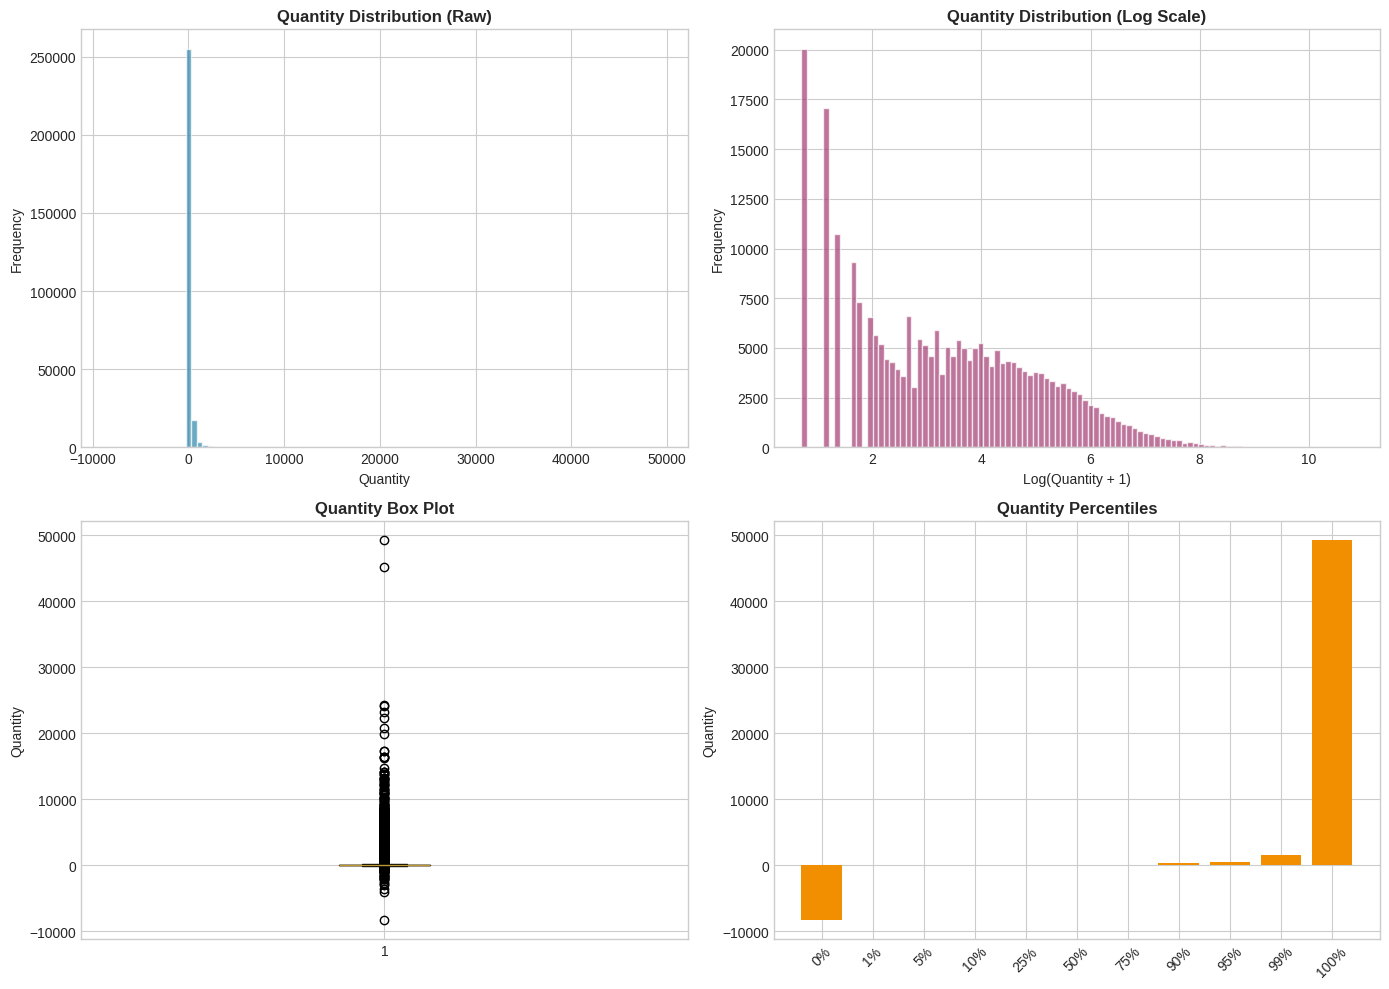


📊 Quantity Percentiles:


,Percentile,Value
0,0,-8315.00
1,1,-9.00
2,5,-1.00
3,10,1.00
4,25,3.00
5,50,19.00
6,75,87.00
7,90,280.00
8,95,515.00
9,99,1593.00


In [198]:
# 2.6 Quantity Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Raw distribution
axes[0, 0].hist(train['quantity'], bins=100, color=COLORS['primary'], edgecolor='white', alpha=0.7)
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Quantity Distribution (Raw)', fontweight='bold')

# Log distribution (for positive values)
positive_qty = train[train['quantity'] > 0]['quantity']
axes[0, 1].hist(np.log1p(positive_qty), bins=100, color=COLORS['secondary'], edgecolor='white', alpha=0.7)
axes[0, 1].set_xlabel('Log(Quantity + 1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Quantity Distribution (Log Scale)', fontweight='bold')

# Box plot
axes[1, 0].boxplot(train['quantity'], vert=True)
axes[1, 0].set_ylabel('Quantity')
axes[1, 0].set_title('Quantity Box Plot', fontweight='bold')

# Percentile analysis
percentiles = [0, 1, 5, 10, 25, 50, 75, 90, 95, 99, 100]
percentile_values = np.percentile(train['quantity'], percentiles)
axes[1, 1].bar(range(len(percentiles)), percentile_values, color=COLORS['tertiary'])
axes[1, 1].set_xticks(range(len(percentiles)))
axes[1, 1].set_xticklabels([f'{p}%' for p in percentiles], rotation=45)
axes[1, 1].set_ylabel('Quantity')
axes[1, 1].set_title('Quantity Percentiles', fontweight='bold')

plt.tight_layout()
plt.show()

# Print percentile table
print("\n📊 Quantity Percentiles:")
percentile_df = pd.DataFrame({'Percentile': percentiles, 'Value': percentile_values})
display(percentile_df)


## 3. Data Preprocessing & Merging


In [199]:
# 3.1 Convert Date Columns
train['date'] = pd.to_datetime(train['date'])
product_master['start_production_date'] = pd.to_datetime(product_master['start_production_date'])
product_master['end_production_date'] = pd.to_datetime(product_master['end_production_date'])

# Extract date components
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['quarter'] = train['date'].dt.quarter
train['year_month'] = train['date'].dt.to_period('M')
train['day_of_week'] = train['date'].dt.dayofweek
train['week_of_year'] = train['date'].dt.isocalendar().week

print("✅ Date columns converted!")
print(f"   Date range: {train['date'].min()} to {train['date'].max()}")
print(f"   Total months: {train['year_month'].nunique()}")
print(f"   Years covered: {sorted(train['year'].unique())}")


✅ Date columns converted!
   Date range: 2022-01-01 00:00:00 to 2024-10-01 00:00:00
   Total months: 34
   Years covered: [np.int32(2022), np.int32(2023), np.int32(2024)]


In [200]:
# 3.2 Merge Train with Product Master
df = train.merge(product_master, on='product_code', how='left')

print(f"✅ Data merged!")
print(f"   Original train rows: {len(train):,}")
print(f"   Merged data rows: {len(df):,}")
print(f"   Columns: {df.columns.tolist()}")

# Check merge quality
unmatched = df[df['category'].isnull()]['product_code'].nunique()
print(f"\n⚠️  Unmatched product codes: {unmatched:,}")


✅ Data merged!
   Original train rows: 278,901
   Merged data rows: 278,901
   Columns: ['market', 'product_code', 'date', 'quantity', 'year', 'month', 'quarter', 'year_month', 'day_of_week', 'week_of_year', 'category', 'business_line_code', 'business_line', 'sector', 'structure_code', 'factory', 'brand', 'start_production_date', 'end_production_date']

⚠️  Unmatched product codes: 0


In [201]:
# 3.3 Create Product Hierarchy Fields
df['structure'] = df['category'].astype(str) + '_' + df['structure_code'].astype(str)

# Create hierarchy level aggregations
print("\n📊 Product Hierarchy Summary:")
print(f"   Business Line Codes: {df['business_line_code'].nunique()}")
print(f"   Sectors: {df['sector'].nunique()}")
print(f"   Business Lines: {df['business_line'].nunique()}")
print(f"   Categories: {df['category'].nunique()}")
print(f"   Structures: {df['structure'].nunique()}")
print(f"   SKUs (product_code): {df['product_code'].nunique()}")



📊 Product Hierarchy Summary:
   Business Line Codes: 7
   Sectors: 8
   Business Lines: 13
   Categories: 45
   Structures: 257
   SKUs (product_code): 8705


In [202]:
# 3.4 Create Complete Time Series (Handle Missing Months as Zero)
def fill_missing_months(df, group_cols=['market', 'product_code']):
    """Fill missing months with zero quantity"""
    
    # Get date range
    min_date = df['date'].min()
    max_date = df['date'].max()
    
    # Create all months
    all_months = pd.date_range(start=min_date, end=max_date, freq='MS')
    
    # Get all unique combinations
    unique_groups = df[group_cols].drop_duplicates()
    
    # Create complete index
    complete_index = pd.MultiIndex.from_product(
        [unique_groups[col].unique() for col in group_cols] + [all_months],
        names=group_cols + ['date']
    )
    
    # This can be memory intensive, so let's just count missing
    existing = df.groupby(group_cols + ['date']).size().reset_index(name='count')
    n_existing = len(existing)
    n_possible = len(unique_groups) * len(all_months)
    n_missing = n_possible - n_existing
    
    return n_missing, n_possible, len(all_months)

n_missing, n_possible, n_months = fill_missing_months(df)
print(f"\n📊 Missing Months Analysis:")
print(f"   Total possible SKU-Market-Month combinations: {n_possible:,}")
print(f"   Existing combinations: {n_possible - n_missing:,}")
print(f"   Missing combinations (treated as zero): {n_missing:,}")
print(f"   Missing percentage: {(n_missing/n_possible)*100:.2f}%")



📊 Missing Months Analysis:
   Total possible SKU-Market-Month combinations: 685,032
   Existing combinations: 278,901
   Missing combinations (treated as zero): 406,131
   Missing percentage: 59.29%


## 4. Temporal Analysis (Trend & Seasonality)


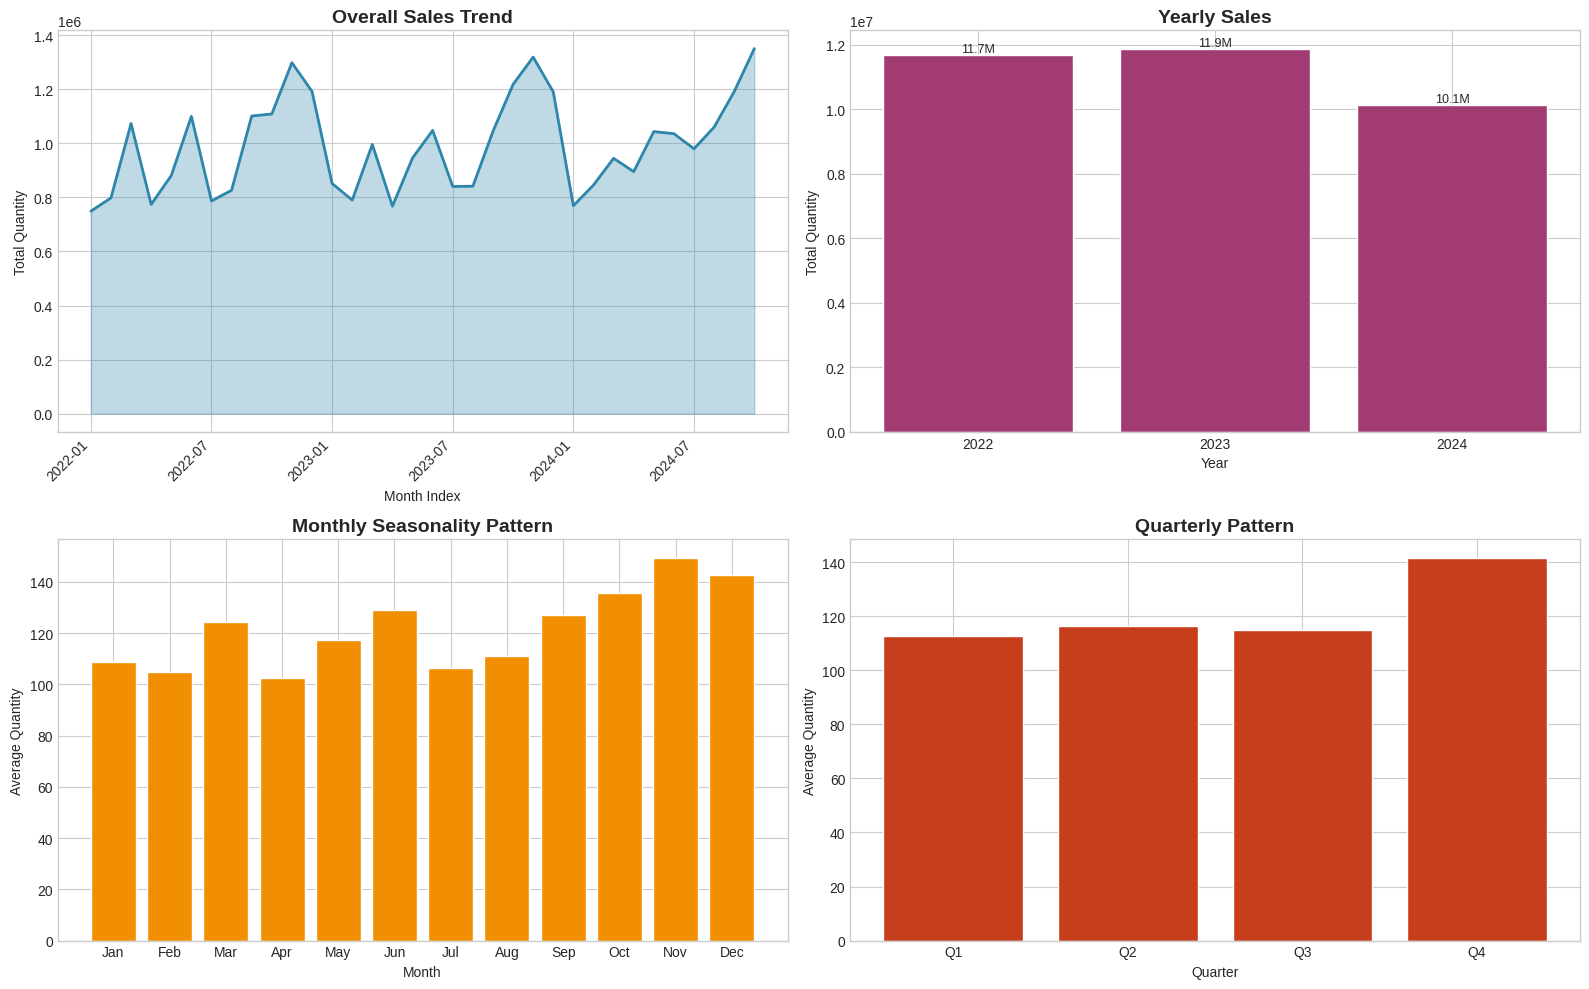

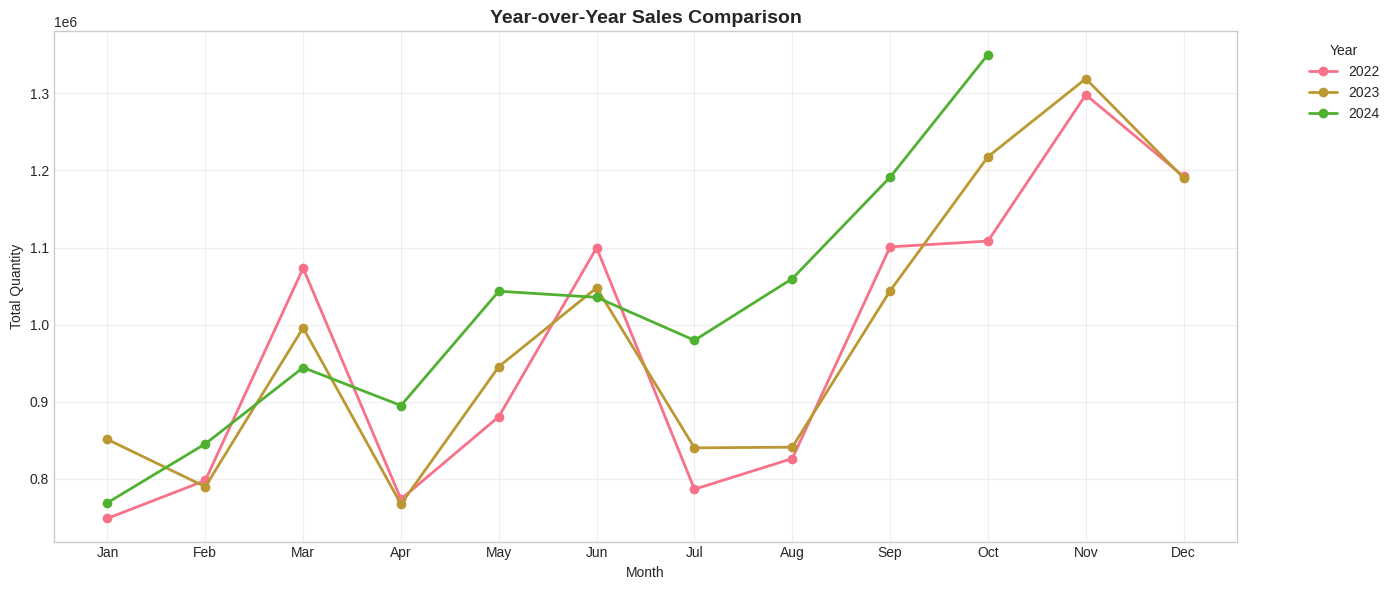

In [203]:
# 4.1 Overall Sales Trend
monthly_sales = df.groupby('year_month')['quantity'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Overall trend
axes[0, 0].plot(range(len(monthly_sales)), monthly_sales['quantity'], 
                color=COLORS['primary'], linewidth=2)
axes[0, 0].fill_between(range(len(monthly_sales)), monthly_sales['quantity'], 
                         alpha=0.3, color=COLORS['primary'])
axes[0, 0].set_xlabel('Month Index')
axes[0, 0].set_ylabel('Total Quantity')
axes[0, 0].set_title('Overall Sales Trend', fontsize=14, fontweight='bold')

# Set x-ticks to show every 6 months
tick_positions = range(0, len(monthly_sales), 6)
tick_labels = [monthly_sales['year_month'].iloc[i] for i in tick_positions if i < len(monthly_sales)]
axes[0, 0].set_xticks(list(tick_positions)[:len(tick_labels)])
axes[0, 0].set_xticklabels(tick_labels, rotation=45, ha='right')

# Yearly trend
yearly_sales = df.groupby('year')['quantity'].sum()
axes[0, 1].bar(yearly_sales.index.astype(str), yearly_sales.values, 
               color=COLORS['secondary'], edgecolor='white')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Total Quantity')
axes[0, 1].set_title('Yearly Sales', fontsize=14, fontweight='bold')

# Add growth rate annotations
for i, (year, val) in enumerate(yearly_sales.items()):
    axes[0, 1].text(i, val, f'{val/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

# Monthly seasonality
monthly_pattern = df.groupby('month')['quantity'].mean()
axes[1, 0].bar(monthly_pattern.index, monthly_pattern.values, 
               color=COLORS['tertiary'], edgecolor='white')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Average Quantity')
axes[1, 0].set_title('Monthly Seasonality Pattern', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Quarterly pattern
quarterly_pattern = df.groupby('quarter')['quantity'].mean()
axes[1, 1].bar(['Q1', 'Q2', 'Q3', 'Q4'], quarterly_pattern.values, 
               color=COLORS['quaternary'], edgecolor='white')
axes[1, 1].set_xlabel('Quarter')
axes[1, 1].set_ylabel('Average Quantity')
axes[1, 1].set_title('Quarterly Pattern', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# %%
# 4.2 Year-over-Year Comparison
pivot_yoy = df.groupby(['year', 'month'])['quantity'].sum().unstack(level=0)

fig, ax = plt.subplots(figsize=(14, 6))

for year in pivot_yoy.columns:
    ax.plot(pivot_yoy.index, pivot_yoy[year], marker='o', label=str(year), linewidth=2)

ax.set_xlabel('Month')
ax.set_ylabel('Total Quantity')
ax.set_title('Year-over-Year Sales Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


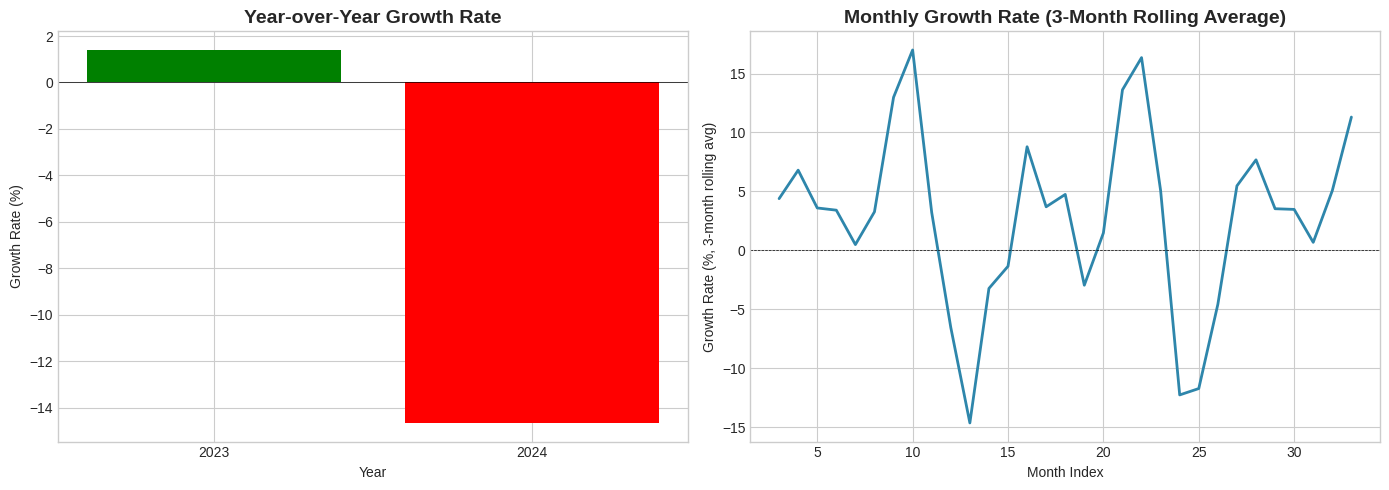

In [204]:
# 4.3 Growth Rate Analysis
yearly_growth = yearly_sales.pct_change() * 100
monthly_growth = monthly_sales.set_index('year_month')['quantity'].pct_change() * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Yearly growth
colors = ['green' if x >= 0 else 'red' for x in yearly_growth.dropna().values]
axes[0].bar(yearly_growth.dropna().index.astype(str), yearly_growth.dropna().values, color=colors)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Growth Rate (%)')
axes[0].set_title('Year-over-Year Growth Rate', fontsize=14, fontweight='bold')

# Rolling 3-month growth
rolling_growth = monthly_growth.rolling(3).mean()
axes[1].plot(range(len(rolling_growth)), rolling_growth.values, color=COLORS['primary'], linewidth=2)
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=0.5)
axes[1].set_xlabel('Month Index')
axes[1].set_ylabel('Growth Rate (%, 3-month rolling avg)')
axes[1].set_title('Monthly Growth Rate (3-Month Rolling Average)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


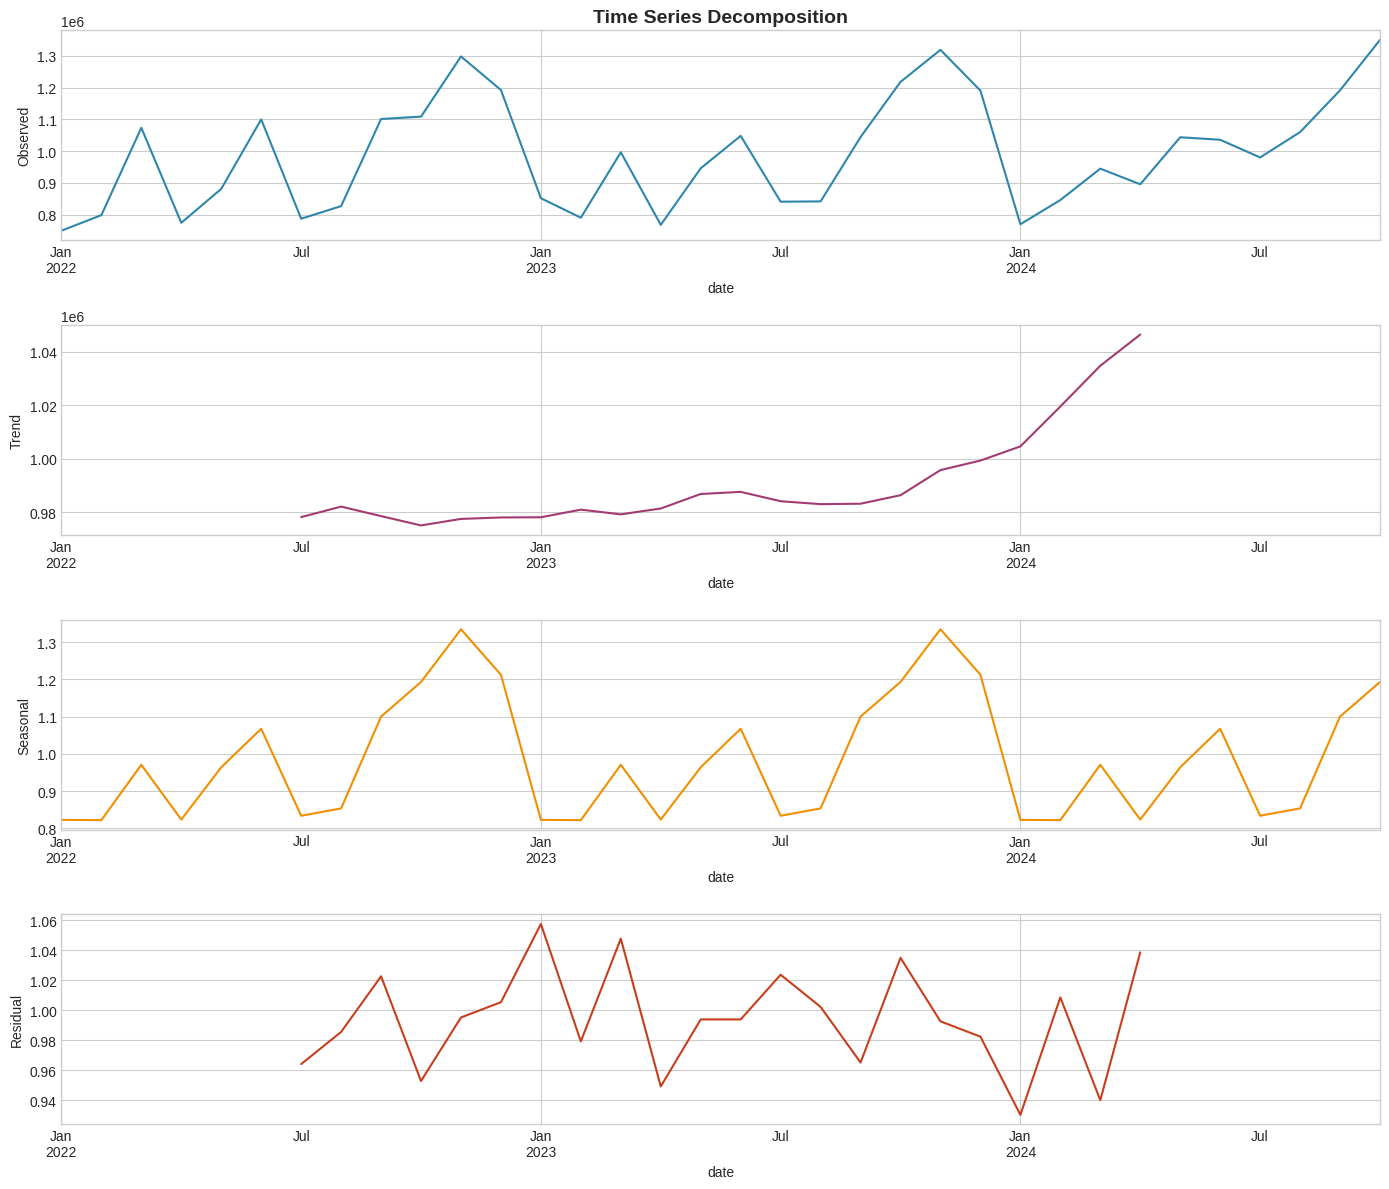


📊 Seasonal Indices (Multiplicative):
   Jan: 0.823
   Feb: 0.822
   Mar: 0.971
   Apr: 0.824
   May: 0.964
   Jun: 1.068
   Jul: 0.834
   Aug: 0.854
   Sep: 1.100
   Oct: 1.193
   Nov: 1.334
   Dec: 1.212


In [205]:
# 4.4 Time Series Decomposition
# Aggregate to monthly total for decomposition
ts_monthly = df.groupby('date')['quantity'].sum().resample('MS').sum()

# Perform decomposition
try:
    decomposition = seasonal_decompose(ts_monthly, model='multiplicative', period=12)
    
    fig, axes = plt.subplots(4, 1, figsize=(14, 12))
    
    decomposition.observed.plot(ax=axes[0], color=COLORS['primary'])
    axes[0].set_ylabel('Observed')
    axes[0].set_title('Time Series Decomposition', fontsize=14, fontweight='bold')
    
    decomposition.trend.plot(ax=axes[1], color=COLORS['secondary'])
    axes[1].set_ylabel('Trend')
    
    decomposition.seasonal.plot(ax=axes[2], color=COLORS['tertiary'])
    axes[2].set_ylabel('Seasonal')
    
    decomposition.resid.plot(ax=axes[3], color=COLORS['quaternary'])
    axes[3].set_ylabel('Residual')
    
    plt.tight_layout()
    plt.show()
    
    # Seasonality indices
    seasonal_indices = decomposition.seasonal[:12]
    print("\n📊 Seasonal Indices (Multiplicative):")
    for i, val in enumerate(seasonal_indices):
        month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][i]
        print(f"   {month_name}: {val:.3f}")
        
except Exception as e:
    print(f"⚠️ Decomposition failed: {e}")

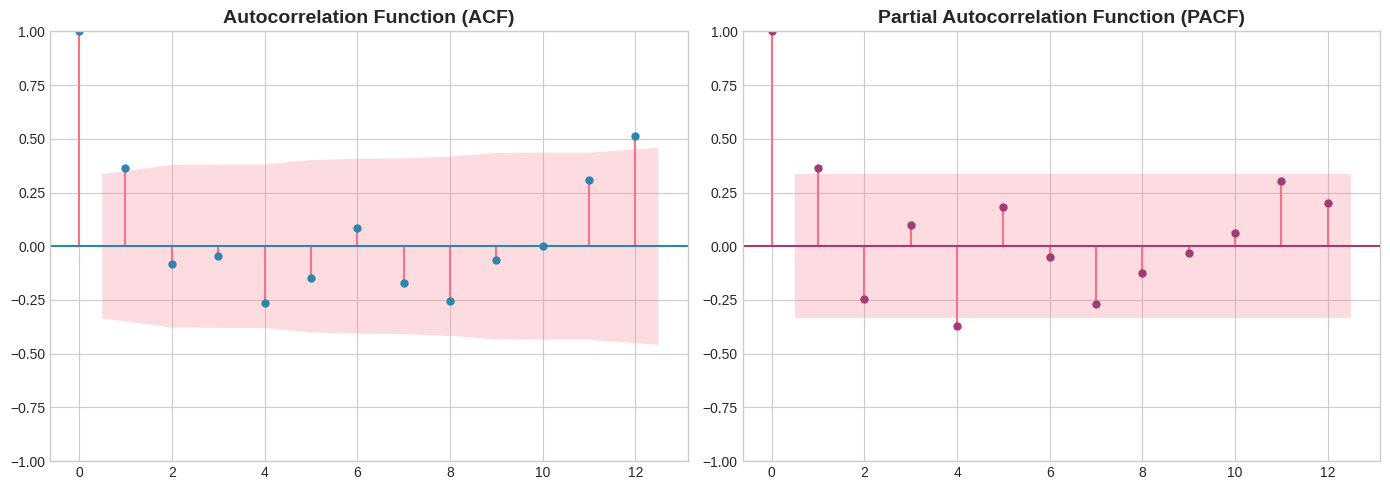

In [206]:
# 4.5 Autocorrelation Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF
plot_acf(ts_monthly.dropna(), lags=12, ax=axes[0], color=COLORS['primary'])
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=14, fontweight='bold')

# PACF
plot_pacf(ts_monthly.dropna(), lags=12, ax=axes[1], color=COLORS['secondary'])
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 5. Market Analysis


In [207]:
# 5.1 Market Overview
market_summary = df.groupby('market').agg({
    'quantity': ['sum', 'mean', 'std', 'count'],
    'product_code': 'nunique'
}).round(2)
market_summary.columns = ['Total Qty', 'Mean Qty', 'Std Qty', 'Transactions', 'Unique SKUs']
market_summary = market_summary.sort_values('Total Qty', ascending=False)
market_summary['% of Total'] = (market_summary['Total Qty'] / market_summary['Total Qty'].sum() * 100).round(2)

print("📊 Market Summary:")
display(market_summary)


📊 Market Summary:


,Total Qty,Mean Qty,Std Qty,Transactions,Unique SKUs,% of Total
market,,,,,,
MKT_014,6554551,208.03,652.11,31508,2178,19.48
MKT_027,5570416,149.72,400.91,37205,2125,16.55
MKT_009,4891333,149.99,393.43,32612,1869,14.53
MKT_021,2692714,142.73,375.72,18866,1096,8.00
MKT_011,1560316,120.26,476.83,12975,865,4.64
MKT_025,1530286,1216.44,2571.20,1258,145,4.55
MKT_016,1430854,90.68,194.61,15779,1160,4.25
MKT_008,1046566,247.77,570.59,4224,1020,3.11
MKT_007,868469,39.21,97.77,22151,1388,2.58


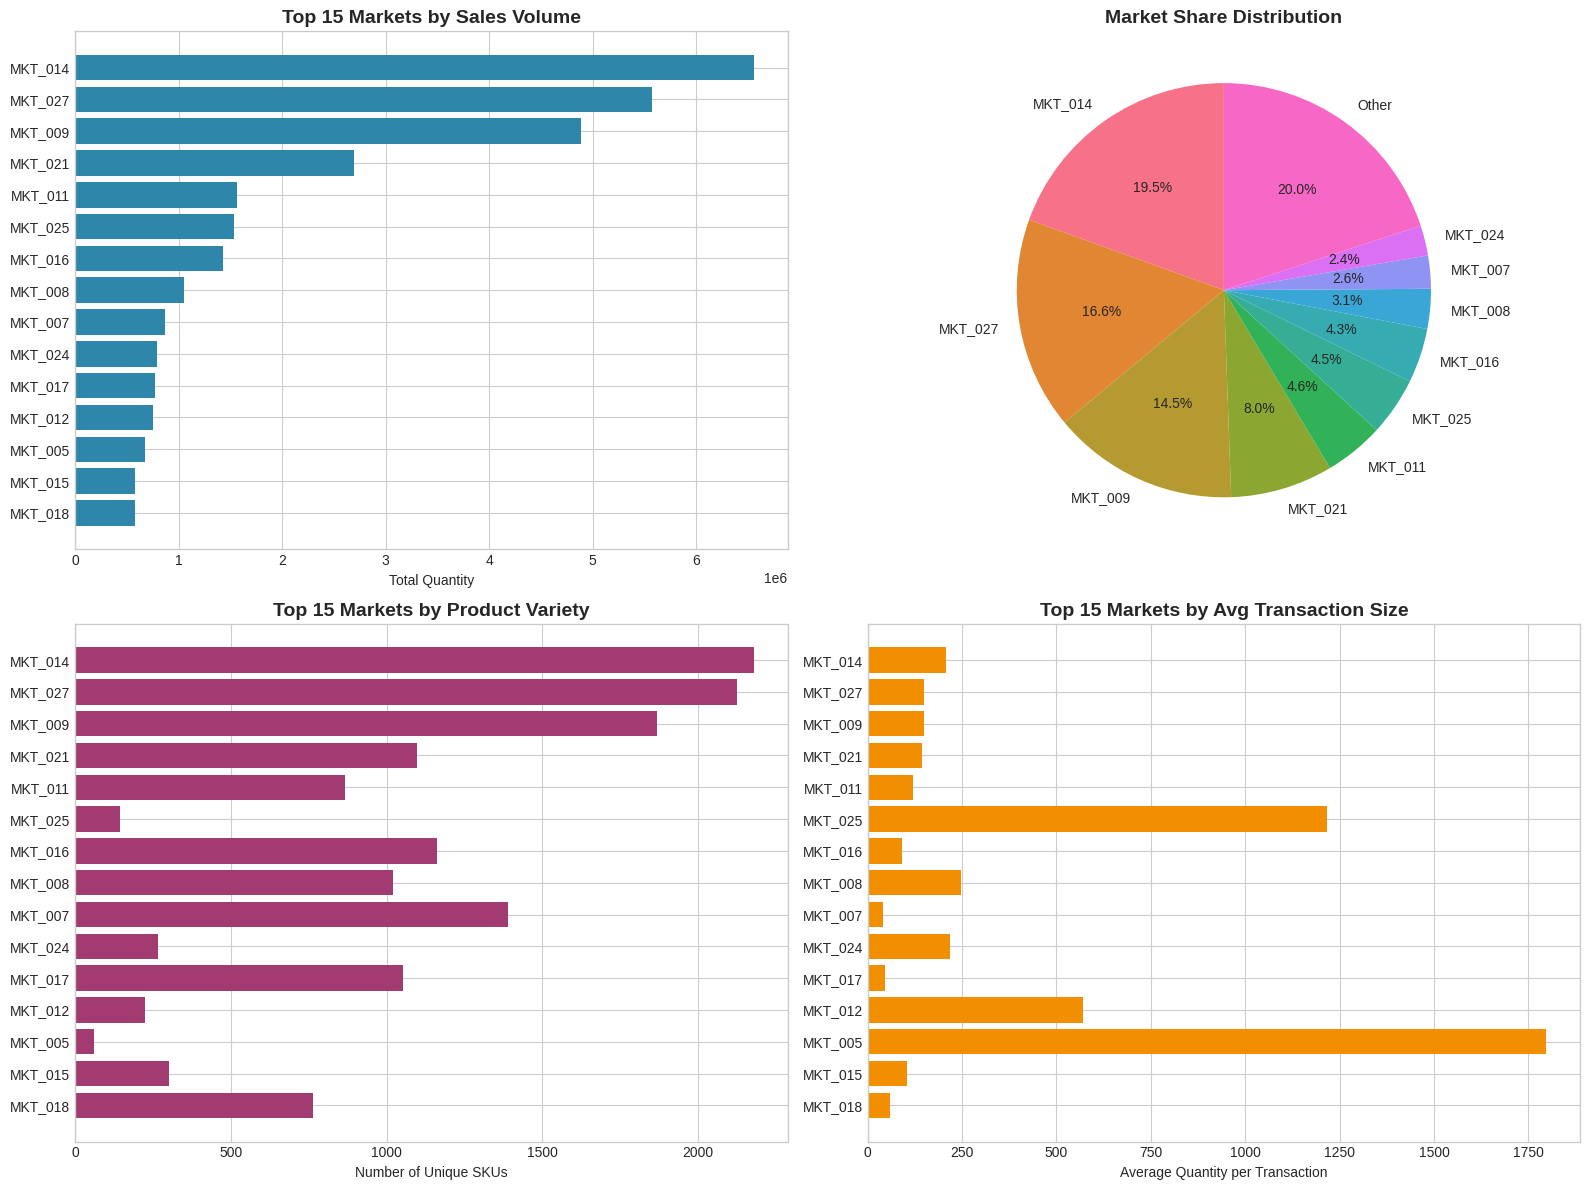

In [208]:
# 5.2 Market Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top markets by volume
top_markets = market_summary.head(15)
axes[0, 0].barh(top_markets.index[::-1], top_markets['Total Qty'][::-1], color=COLORS['primary'])
axes[0, 0].set_xlabel('Total Quantity')
axes[0, 0].set_title('Top 15 Markets by Sales Volume', fontsize=14, fontweight='bold')

# Market share pie chart
top_n = 10
market_share = market_summary['Total Qty'].head(top_n)
other = market_summary['Total Qty'].iloc[top_n:].sum()
market_share_plot = pd.concat([market_share, pd.Series({'Other': other})])

axes[0, 1].pie(market_share_plot, labels=market_share_plot.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette('husl', len(market_share_plot)))
axes[0, 1].set_title('Market Share Distribution', fontsize=14, fontweight='bold')

# Markets by unique SKUs
axes[1, 0].barh(top_markets.index[::-1], top_markets['Unique SKUs'][::-1], color=COLORS['secondary'])
axes[1, 0].set_xlabel('Number of Unique SKUs')
axes[1, 0].set_title('Top 15 Markets by Product Variety', fontsize=14, fontweight='bold')

# Average quantity per transaction
axes[1, 1].barh(top_markets.index[::-1], top_markets['Mean Qty'][::-1], color=COLORS['tertiary'])
axes[1, 1].set_xlabel('Average Quantity per Transaction')
axes[1, 1].set_title('Top 15 Markets by Avg Transaction Size', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


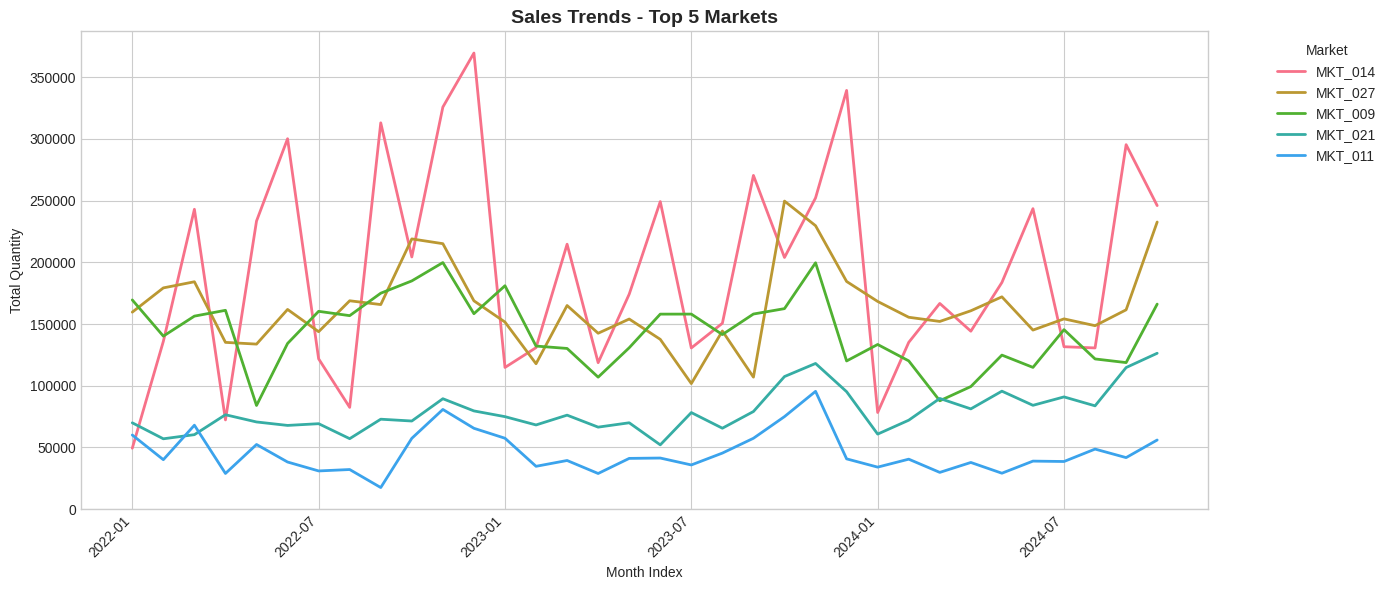

In [209]:
# 5.3 Market Trends Over Time
top_5_markets = market_summary.head(5).index.tolist()

market_trends = df[df['market'].isin(top_5_markets)].groupby(
    ['year_month', 'market'])['quantity'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 6))

for market in top_5_markets:
    if market in market_trends.columns:
        ax.plot(range(len(market_trends)), market_trends[market], label=market, linewidth=2)

ax.set_xlabel('Month Index')
ax.set_ylabel('Total Quantity')
ax.set_title('Sales Trends - Top 5 Markets', fontsize=14, fontweight='bold')
ax.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add x-tick labels
tick_positions = range(0, len(market_trends), 6)
tick_labels = [str(market_trends.index[i]) for i in tick_positions if i < len(market_trends)]
ax.set_xticks(list(tick_positions)[:len(tick_labels)])
ax.set_xticklabels(tick_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()


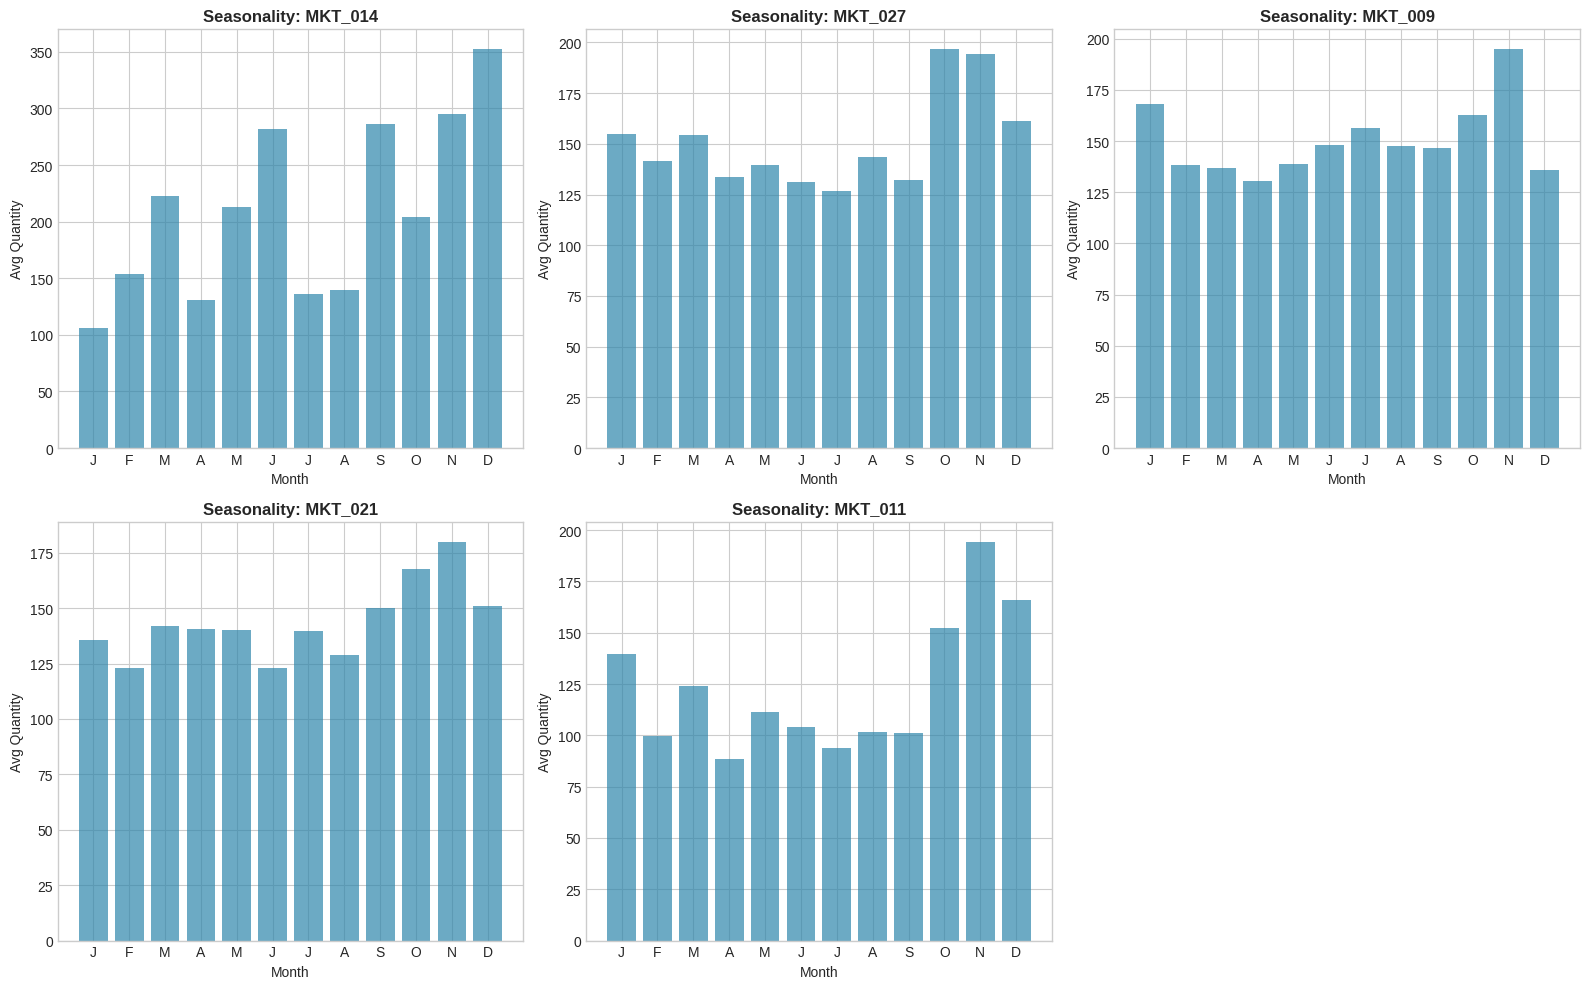

In [210]:
# 5.4 Market Seasonality Comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, market in enumerate(top_5_markets[:6]):
    market_data = df[df['market'] == market]
    monthly_pattern = market_data.groupby('month')['quantity'].mean()
    
    axes[i].bar(monthly_pattern.index, monthly_pattern.values, color=COLORS['primary'], alpha=0.7)
    axes[i].set_title(f'Seasonality: {market}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Avg Quantity')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# Hide empty subplot if exists
if len(top_5_markets) < 6:
    axes[5].set_visible(False)

plt.tight_layout()
plt.show()


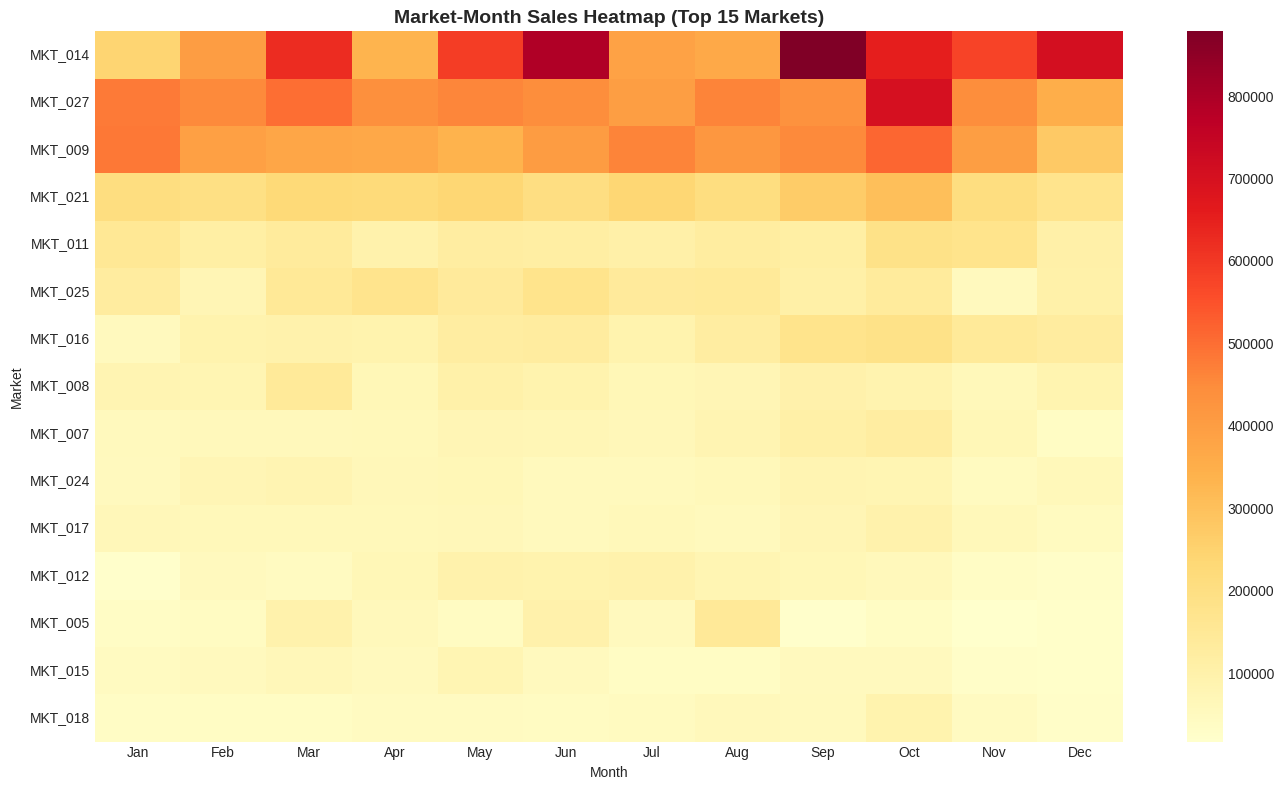

In [211]:
# 5.5 Market Heatmap - Monthly Sales
market_month_pivot = df.groupby(['market', 'month'])['quantity'].sum().unstack()
market_month_pivot = market_month_pivot.loc[top_markets.head(15).index]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(market_month_pivot, cmap='YlOrRd', annot=False, fmt='.0f', ax=ax)
ax.set_title('Market-Month Sales Heatmap (Top 15 Markets)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Market')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


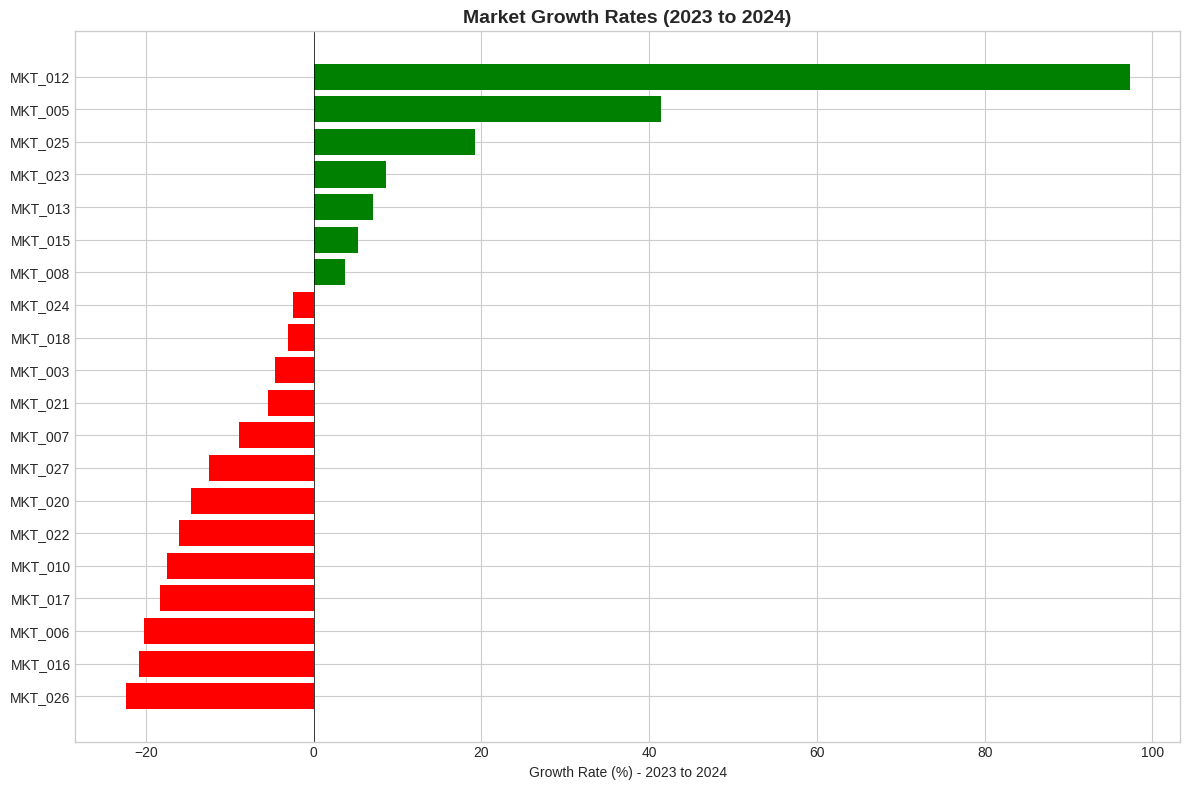

In [212]:
# 5.6 Market Growth Analysis
market_yearly = df.groupby(['market', 'year'])['quantity'].sum().unstack()
market_growth = market_yearly.pct_change(axis=1) * 100

# Get latest year growth for top markets
latest_year = market_yearly.columns[-1]
prev_year = market_yearly.columns[-2] if len(market_yearly.columns) > 1 else None

if prev_year:
    market_growth_latest = market_growth[latest_year].sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = ['green' if x >= 0 else 'red' for x in market_growth_latest.head(20).values]
    ax.barh(market_growth_latest.head(20).index[::-1], 
            market_growth_latest.head(20).values[::-1], color=colors[::-1])
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax.set_xlabel(f'Growth Rate (%) - {prev_year} to {latest_year}')
    ax.set_title(f'Market Growth Rates ({prev_year} to {latest_year})', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()



## 6. Product Hierarchy Analysis


In [213]:
# 6.1 Business Line Code Analysis
blc_summary = df.groupby('business_line_code').agg({
    'quantity': ['sum', 'mean', 'count'],
    'product_code': 'nunique',
    'market': 'nunique'
}).round(2)
blc_summary.columns = ['Total Qty', 'Mean Qty', 'Transactions', 'Unique SKUs', 'Markets']
blc_summary = blc_summary.sort_values('Total Qty', ascending=False)
blc_summary['% of Total'] = (blc_summary['Total Qty'] / blc_summary['Total Qty'].sum() * 100).round(2)

print("📊 Business Line Code Summary:")
display(blc_summary)

📊 Business Line Code Summary:


,Total Qty,Mean Qty,Transactions,Unique SKUs,Markets,% of Total
business_line_code,,,,,,
BLC_03,19234389,125.97,152689,4665,27,57.15
BLC_02,9758498,93.11,104804,3524,27,29.00
BLC_01,4435772,233.29,19014,465,25,13.18
BLC_05,132633,120.47,1101,28,19,0.39
BLC_04,69373,91.16,761,14,17,0.21
BLC_07,22584,42.69,529,8,12,0.07
BLC_06,436,145.33,3,1,1,0.00


In [214]:
# 6.2 Sector Analysis
sector_summary = df.groupby('sector').agg({
    'quantity': ['sum', 'mean', 'count'],
    'product_code': 'nunique',
    'category': 'nunique'
}).round(2)
sector_summary.columns = ['Total Qty', 'Mean Qty', 'Transactions', 'Unique SKUs', 'Categories']
sector_summary = sector_summary.sort_values('Total Qty', ascending=False)
sector_summary['% of Total'] = (sector_summary['Total Qty'] / sector_summary['Total Qty'].sum() * 100).round(2)

print("📊 Sector Summary:")
display(sector_summary)


📊 Sector Summary:


,Total Qty,Mean Qty,Transactions,Unique SKUs,Categories,% of Total
sector,,,,,,
SECTOR_02,13826109,138.75,99651,3342,8,41.08
SECTOR_03,8489362,97.35,87204,3022,13,25.23
SECTOR_01,6011299,213.30,28183,608,19,17.86
SECTOR_04,5181303,81.95,63228,1674,4,15.40
SECTOR_06,144731,237.65,609,53,1,0.43
SECTOR_08,436,145.33,3,1,1,0.00
SECTOR_05,322,53.67,6,3,3,0.00
SECTOR_07,123,7.24,17,2,1,0.00


In [215]:
# 6.3 Category Analysis
category_summary = df.groupby('category').agg({
    'quantity': ['sum', 'mean', 'count'],
    'product_code': 'nunique',
    'market': 'nunique'
}).round(2)
category_summary.columns = ['Total Qty', 'Mean Qty', 'Transactions', 'Unique SKUs', 'Markets']
category_summary = category_summary.sort_values('Total Qty', ascending=False)
category_summary['% of Total'] = (category_summary['Total Qty'] / category_summary['Total Qty'].sum() * 100).round(2)

print("📊 Category Summary (Top 20):")
display(category_summary.head(20))


📊 Category Summary (Top 20):


,Total Qty,Mean Qty,Transactions,Unique SKUs,Markets,% of Total
category,,,,,,
CAT_12,9622512,155.36,61938,2084,27,28.59
CAT_10,3479563,81.67,42605,1047,26,10.34
CAT_15,2800636,142.21,19694,643,27,8.32
CAT_06,2550719,103.23,24710,804,27,7.58
CAT_04,2499136,93.87,26624,1026,27,7.43
CAT_32,2061270,273.23,7544,159,24,6.12
CAT_23,1521749,194.77,7813,214,24,4.52
CAT_05,1420723,97.40,14586,467,25,4.22
CAT_17,1383056,195.32,7081,116,22,4.11


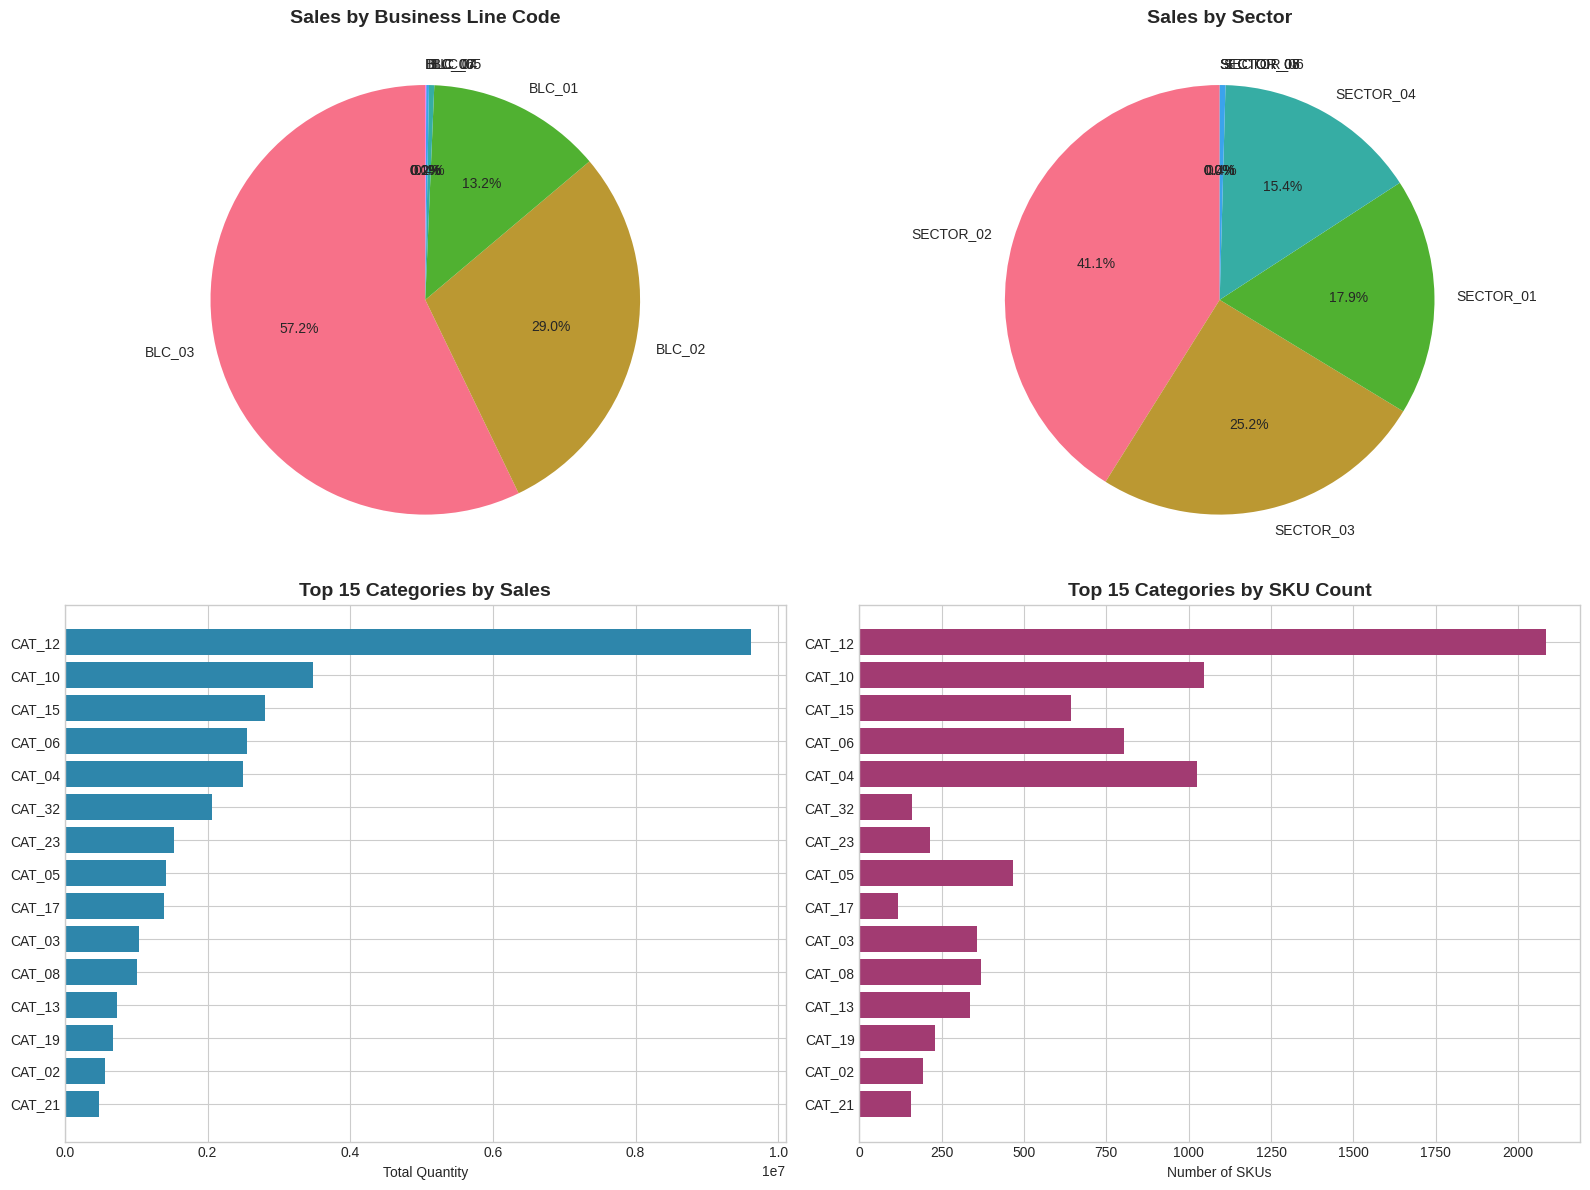

In [216]:
# 6.4 Product Hierarchy Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Business Line Code
blc_plot = blc_summary['Total Qty'].head(10)
axes[0, 0].pie(blc_plot, labels=blc_plot.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Sales by Business Line Code', fontsize=14, fontweight='bold')

# Sector
sector_plot = sector_summary['Total Qty']
axes[0, 1].pie(sector_plot, labels=sector_plot.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Sales by Sector', fontsize=14, fontweight='bold')

# Top Categories
top_categories = category_summary.head(15)
axes[1, 0].barh(top_categories.index[::-1], top_categories['Total Qty'][::-1], color=COLORS['primary'])
axes[1, 0].set_xlabel('Total Quantity')
axes[1, 0].set_title('Top 15 Categories by Sales', fontsize=14, fontweight='bold')

# Categories by SKU count
axes[1, 1].barh(top_categories.index[::-1], top_categories['Unique SKUs'][::-1], color=COLORS['secondary'])
axes[1, 1].set_xlabel('Number of SKUs')
axes[1, 1].set_title('Top 15 Categories by SKU Count', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [217]:
# 6.5 Hierarchy Treemap
hierarchy_data = df.groupby(['business_line_code', 'sector', 'category'])['quantity'].sum().reset_index()
hierarchy_data = hierarchy_data[hierarchy_data['quantity'] > 0]

fig = px.treemap(hierarchy_data, 
                    path=['business_line_code', 'sector', 'category'], 
                    values='quantity',
                    title='Product Hierarchy - Sales Distribution')
fig.show()


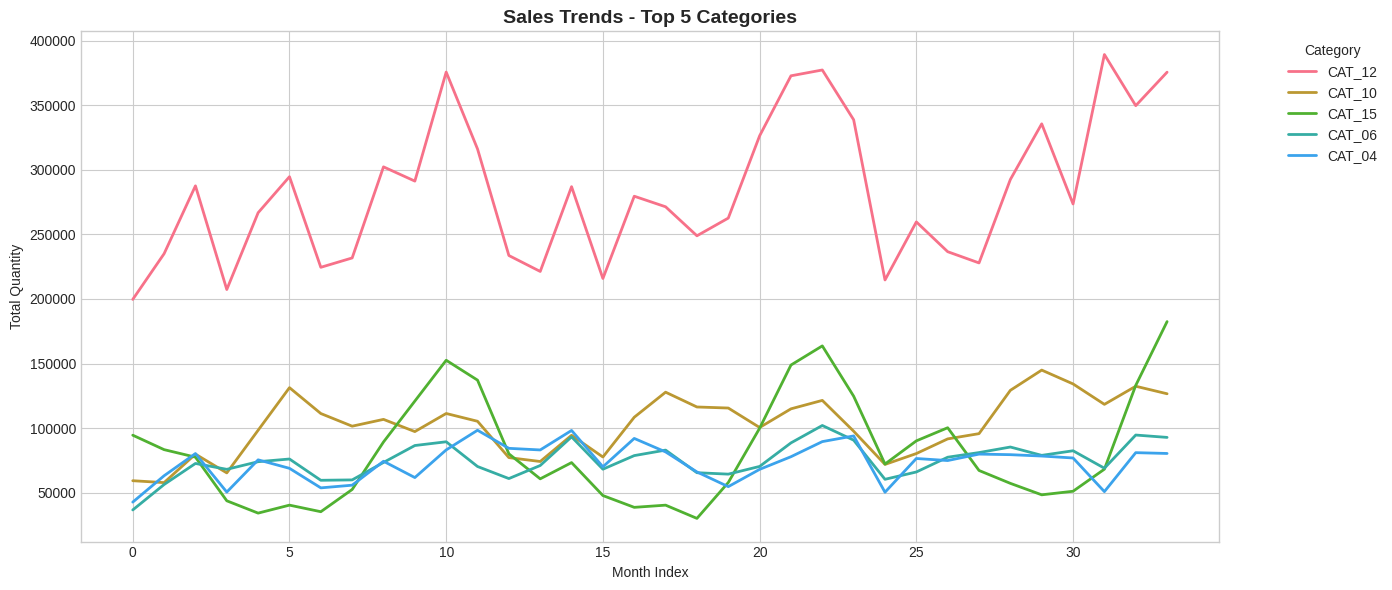

In [218]:
# 6.6 Category Trends
top_5_categories = category_summary.head(5).index.tolist()

category_trends = df[df['category'].isin(top_5_categories)].groupby(
    ['year_month', 'category'])['quantity'].sum().unstack()

fig, ax = plt.subplots(figsize=(14, 6))

for cat in top_5_categories:
    if cat in category_trends.columns:
        ax.plot(range(len(category_trends)), category_trends[cat], label=cat, linewidth=2)

ax.set_xlabel('Month Index')
ax.set_ylabel('Total Quantity')
ax.set_title('Sales Trends - Top 5 Categories', fontsize=14, fontweight='bold')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


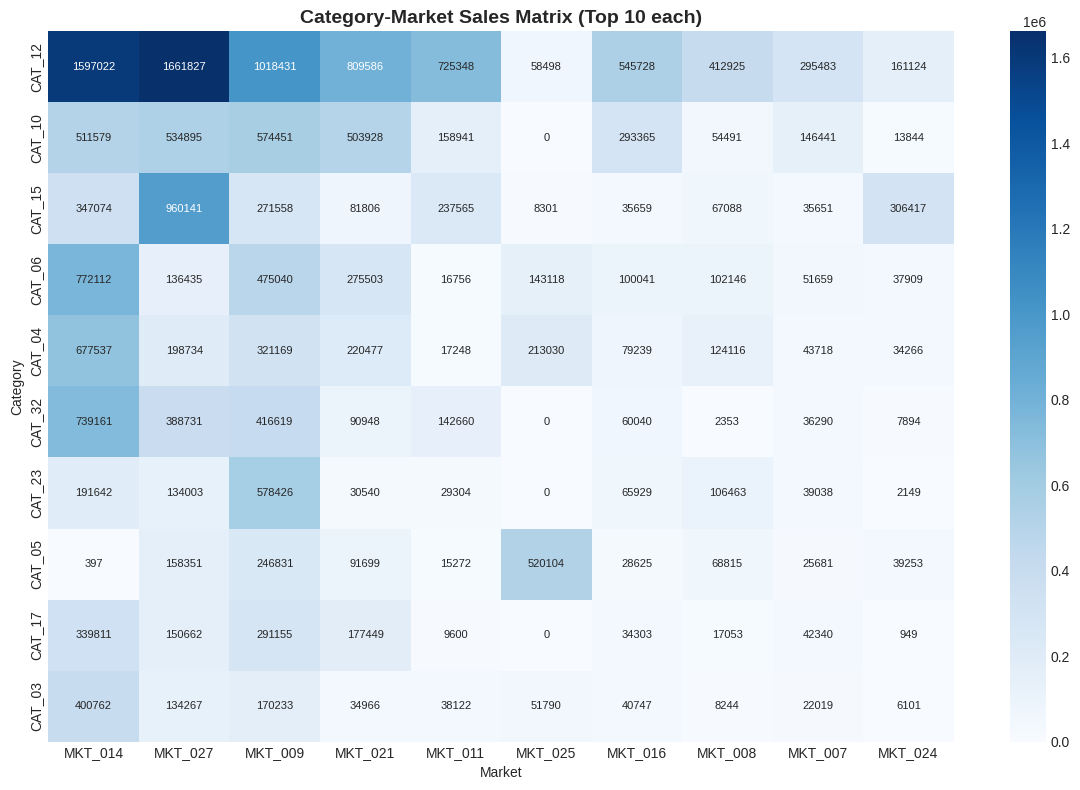

In [219]:
# 6.7 Category-Market Matrix
cat_market = df.groupby(['category', 'market'])['quantity'].sum().unstack(fill_value=0)

# Select top categories and markets
top_cats = category_summary.head(10).index
top_mkts = market_summary.head(10).index
cat_market_subset = cat_market.loc[top_cats, top_mkts]

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cat_market_subset, cmap='Blues', annot=True, fmt='.0f', ax=ax, 
            annot_kws={'size': 8})
ax.set_title('Category-Market Sales Matrix (Top 10 each)', fontsize=14, fontweight='bold')
ax.set_xlabel('Market')
ax.set_ylabel('Category')

plt.tight_layout()
plt.show()


## 7. Factory & Brand Analysis


In [220]:
# 7.1 Factory Analysis
factory_summary = df.groupby('factory').agg({
    'quantity': ['sum', 'mean', 'count'],
    'product_code': 'nunique',
    'category': 'nunique',
    'market': 'nunique'
}).round(2)
factory_summary.columns = ['Total Qty', 'Mean Qty', 'Transactions', 'SKUs', 'Categories', 'Markets']
factory_summary = factory_summary.sort_values('Total Qty', ascending=False)
factory_summary['% of Total'] = (factory_summary['Total Qty'] / factory_summary['Total Qty'].sum() * 100).round(2)

print("📊 Factory Summary:")
display(factory_summary.head(20))

# %%
# 7.2 Brand Analysis
brand_summary = df.groupby('brand').agg({
    'quantity': ['sum', 'mean', 'count'],
    'product_code': 'nunique',
    'market': 'nunique'
}).round(2)
brand_summary.columns = ['Total Qty', 'Mean Qty', 'Transactions', 'SKUs', 'Markets']
brand_summary = brand_summary.sort_values('Total Qty', ascending=False)
brand_summary['% of Total'] = (brand_summary['Total Qty'] / brand_summary['Total Qty'].sum() * 100).round(2)

print("📊 Brand Summary (Top 20):")
display(brand_summary.head(20))


📊 Factory Summary:


,Total Qty,Mean Qty,Transactions,SKUs,Categories,Markets,% of Total
factory,,,,,,,
FACTORY_01,16259779,120.07,135414,4083,43,27,48.32
FACTORY_05,6440979,138.62,46465,1475,2,27,19.14
FACTORY_13,2618750,147.71,17729,591,2,27,7.78
FACTORY_04,2259765,84.57,26721,874,5,27,6.71
FACTORY_09,1738965,114.23,15223,531,5,26,5.17
FACTORY_02,1458273,234.98,6206,269,3,25,4.33
FACTORY_16,1265922,99.36,12741,209,2,25,3.76
FACTORY_03,877135,94.95,9238,285,2,25,2.61
FACTORY_18,607195,90.17,6734,274,2,26,1.80


📊 Brand Summary (Top 20):


,Total Qty,Mean Qty,Transactions,SKUs,Markets,% of Total
brand,,,,,,
BRAND_03,16613353,112.04,148286,3906,27,49.37
BRAND_06,9353777,144.78,64608,2342,24,27.79
BRAND_05,4590252,85.94,53414,1415,23,13.64
BRAND_12,2051629,663.10,3094,362,14,6.10
BRAND_10,682958,106.21,6430,473,8,2.03
BRAND_13,137189,133.84,1025,76,7,0.41
BRAND_02,81383,83.13,979,54,1,0.24
BRAND_01,49390,1975.60,25,5,2,0.15
BRAND_08,44054,60.43,729,59,3,0.13


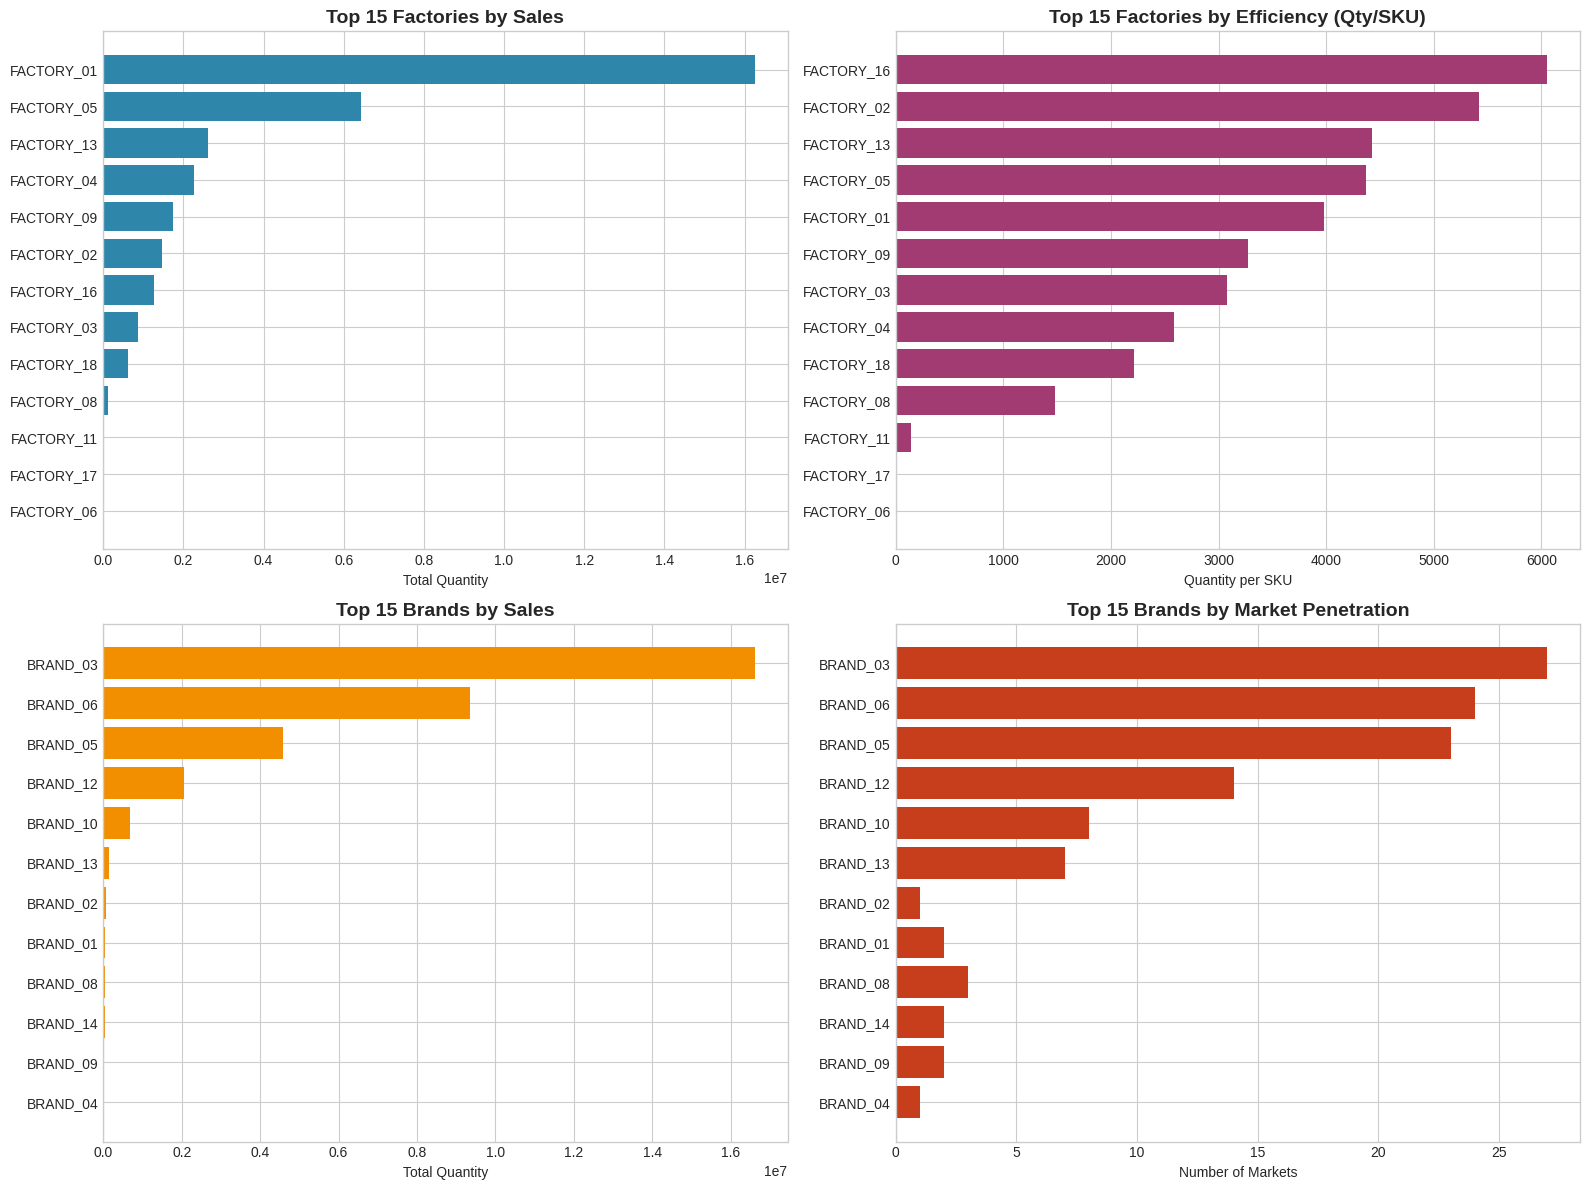

In [221]:
# 7.3 Factory & Brand Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top Factories
top_factories = factory_summary.head(15)
axes[0, 0].barh(top_factories.index[::-1], top_factories['Total Qty'][::-1], color=COLORS['primary'])
axes[0, 0].set_xlabel('Total Quantity')
axes[0, 0].set_title('Top 15 Factories by Sales', fontsize=14, fontweight='bold')

# Factory efficiency (qty per SKU)
factory_summary['Qty_per_SKU'] = factory_summary['Total Qty'] / factory_summary['SKUs']
top_factory_eff = factory_summary.nlargest(15, 'Qty_per_SKU')
axes[0, 1].barh(top_factory_eff.index[::-1], top_factory_eff['Qty_per_SKU'][::-1], color=COLORS['secondary'])
axes[0, 1].set_xlabel('Quantity per SKU')
axes[0, 1].set_title('Top 15 Factories by Efficiency (Qty/SKU)', fontsize=14, fontweight='bold')

# Top Brands
top_brands = brand_summary.head(15)
axes[1, 0].barh(top_brands.index[::-1], top_brands['Total Qty'][::-1], color=COLORS['tertiary'])
axes[1, 0].set_xlabel('Total Quantity')
axes[1, 0].set_title('Top 15 Brands by Sales', fontsize=14, fontweight='bold')

# Brand market penetration
axes[1, 1].barh(top_brands.index[::-1], top_brands['Markets'][::-1], color=COLORS['quaternary'])
axes[1, 1].set_xlabel('Number of Markets')
axes[1, 1].set_title('Top 15 Brands by Market Penetration', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


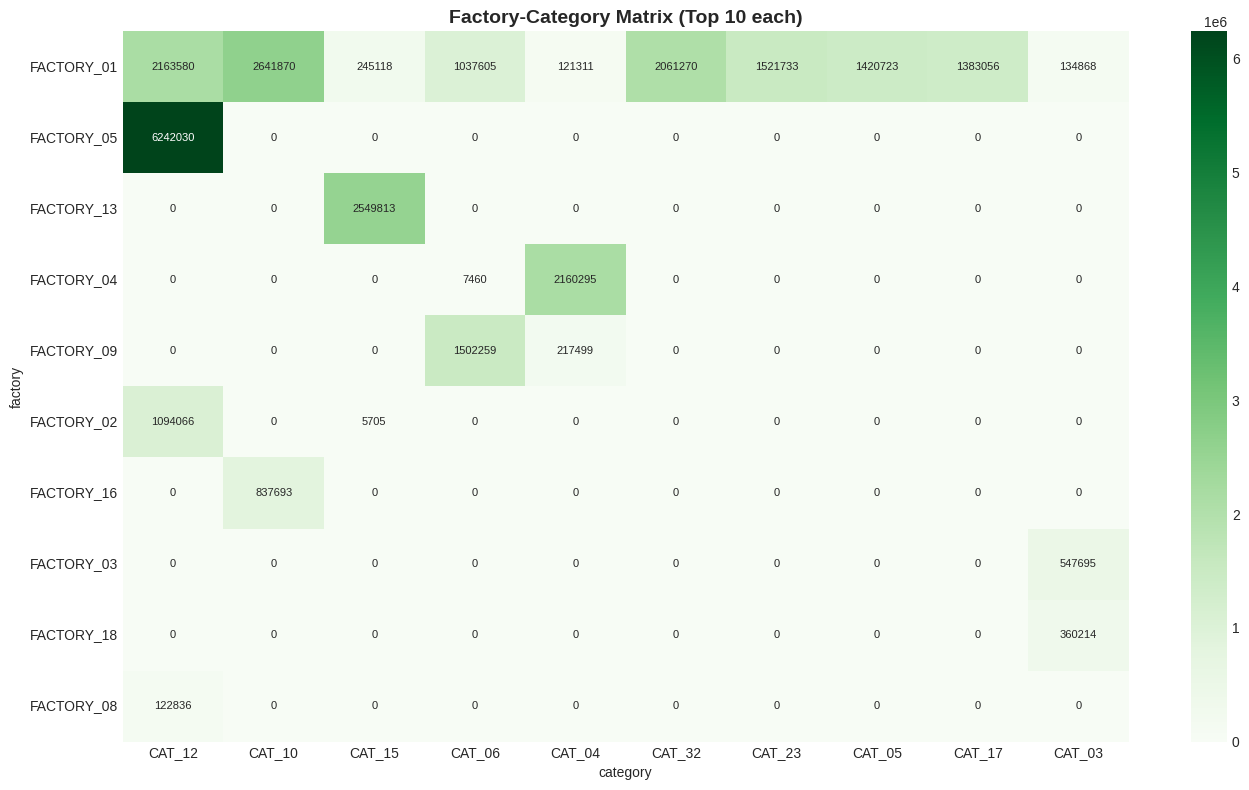

In [222]:
# 7.4 Factory-Category Relationship
factory_cat = df.groupby(['factory', 'category'])['quantity'].sum().unstack(fill_value=0)

# Top factories and categories
top_fact = factory_summary.head(10).index
top_cat = category_summary.head(10).index
factory_cat_subset = factory_cat.loc[top_fact, top_cat]

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(factory_cat_subset, cmap='Greens', annot=True, fmt='.0f', ax=ax,
            annot_kws={'size': 8})
ax.set_title('Factory-Category Matrix (Top 10 each)', fontsize=14, fontweight='bold')

plt.tight_layout()


## 8. Product Lifecycle Analysis


In [223]:
# 8.1 Product Age Analysis
current_date = df['date'].max()

# 8.1 Product Age Analysis (continued)
current_date = df['date'].max()

product_master['product_age_days'] = (current_date - product_master['start_production_date']).dt.days
product_master['product_age_months'] = product_master['product_age_days'] / 30.44
product_master['product_age_years'] = product_master['product_age_days'] / 365.25

# Flag active/discontinued products
product_master['is_discontinued'] = product_master['end_production_date'].notna()
product_master['is_active'] = ~product_master['is_discontinued']

print("📊 Product Lifecycle Overview:")
print(f"   Total products: {len(product_master):,}")
print(f"   Active products: {product_master['is_active'].sum():,}")
print(f"   Discontinued products: {product_master['is_discontinued'].sum():,}")
print(f"   Discontinuation rate: {(product_master['is_discontinued'].sum()/len(product_master))*100:.2f}%")


📊 Product Lifecycle Overview:
   Total products: 14,351
   Active products: 6,379
   Discontinued products: 7,972
   Discontinuation rate: 55.55%


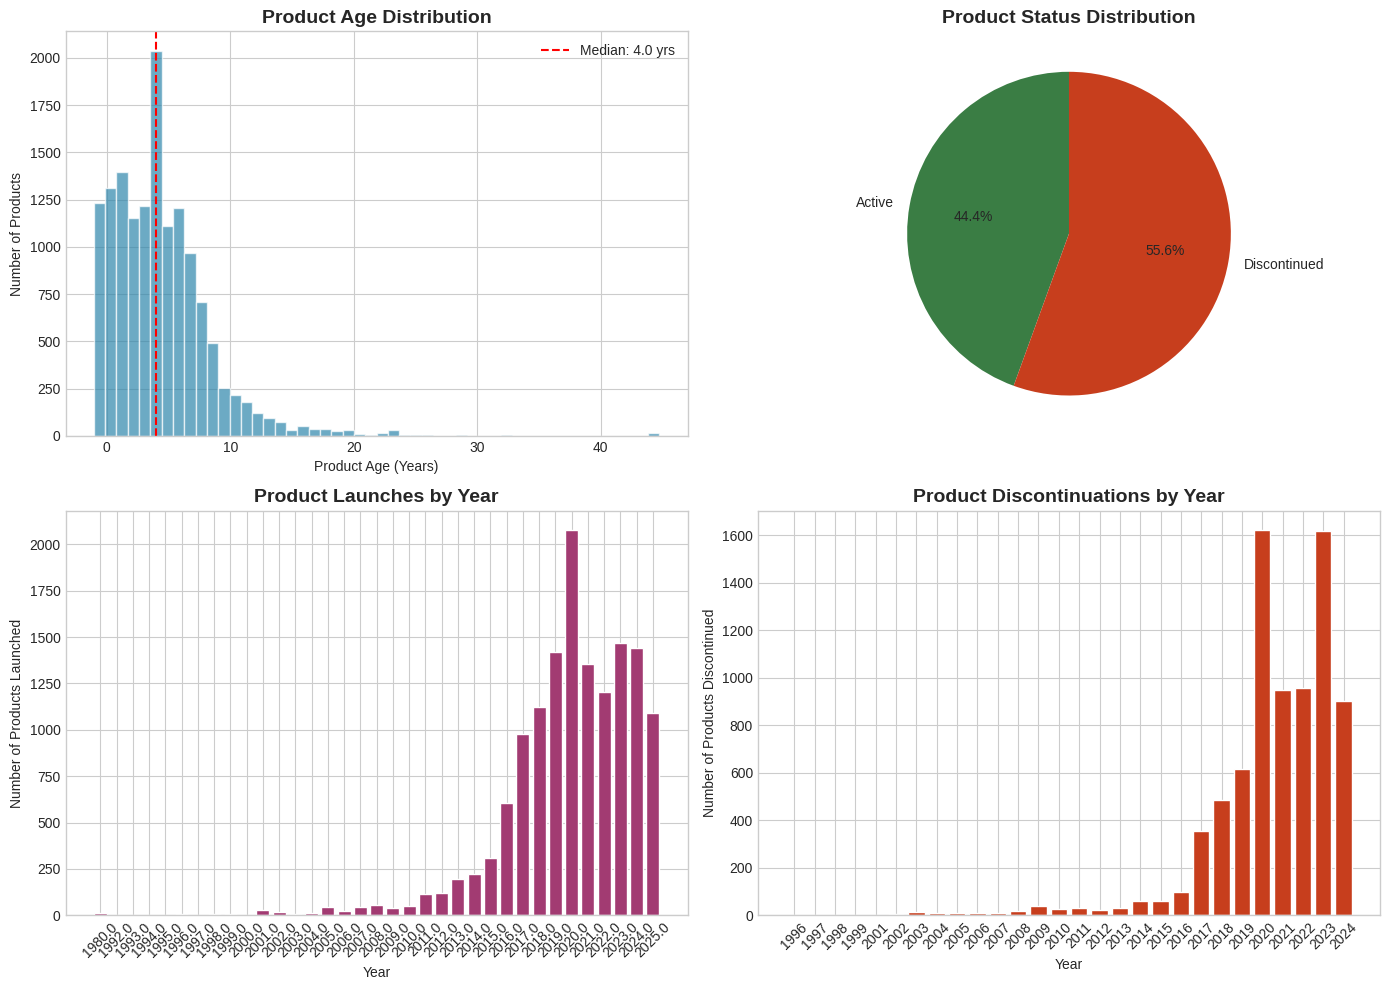

In [224]:
# 8.2 Product Age Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Age distribution (years)
axes[0, 0].hist(product_master['product_age_years'].dropna(), bins=50, 
                color=COLORS['primary'], edgecolor='white', alpha=0.7)
axes[0, 0].set_xlabel('Product Age (Years)')
axes[0, 0].set_ylabel('Number of Products')
axes[0, 0].set_title('Product Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].axvline(product_master['product_age_years'].median(), color='red', 
                   linestyle='--', label=f"Median: {product_master['product_age_years'].median():.1f} yrs")
axes[0, 0].legend()

# Active vs Discontinued
status_counts = product_master['is_active'].value_counts()
axes[0, 1].pie([status_counts.get(True, 0), status_counts.get(False, 0)], 
               labels=['Active', 'Discontinued'], autopct='%1.1f%%',
               colors=[COLORS['success'], COLORS['quaternary']], startangle=90)
axes[0, 1].set_title('Product Status Distribution', fontsize=14, fontweight='bold')

# Product launches over time
launches_by_year = product_master.groupby(
    product_master['start_production_date'].dt.year
).size()
axes[1, 0].bar(launches_by_year.index.astype(str), launches_by_year.values, 
               color=COLORS['secondary'], edgecolor='white')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Products Launched')
axes[1, 0].set_title('Product Launches by Year', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Discontinuations over time
discontinued = product_master[product_master['is_discontinued']]
if len(discontinued) > 0:
    discontinuations_by_year = discontinued.groupby(
        discontinued['end_production_date'].dt.year
    ).size()
    axes[1, 1].bar(discontinuations_by_year.index.astype(str), discontinuations_by_year.values, 
                   color=COLORS['quaternary'], edgecolor='white')
    axes[1, 1].set_xlabel('Year')
    axes[1, 1].set_ylabel('Number of Products Discontinued')
    axes[1, 1].set_title('Product Discontinuations by Year', fontsize=14, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


📊 Product Lifecycle Stages:


lifecycle_stage
Discontinued         7972
New (0-1 yr)         2842
Growing (1-3 yrs)    1997
Mature (3-7 yrs)     1310
Legacy (7+ yrs)       136
Unknown                94
Name: count, dtype: int64

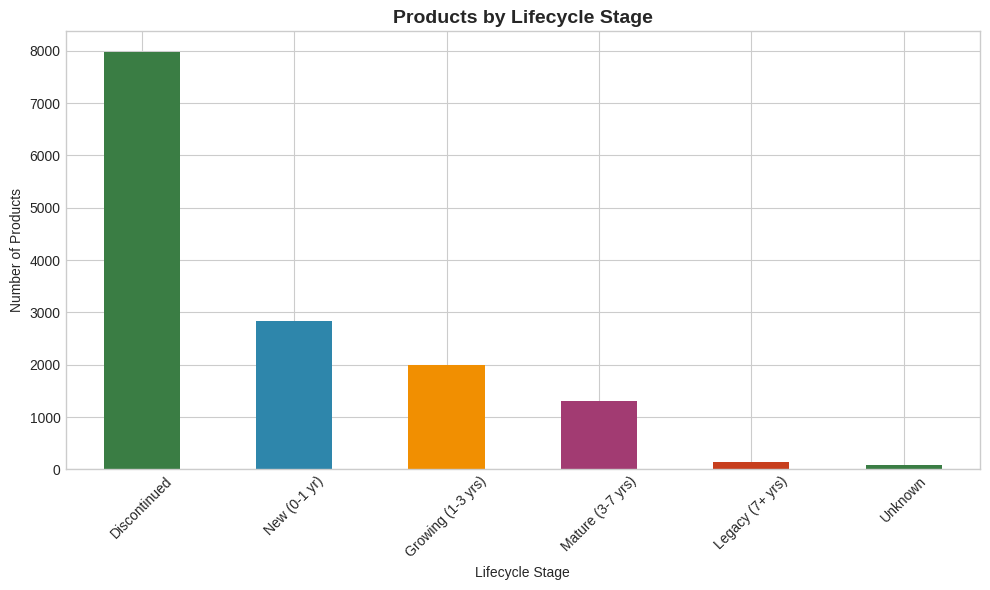

In [225]:
# 8.3 Product Lifecycle Stages
def assign_lifecycle_stage(row):
    """Assign lifecycle stage based on age and status"""
    if row['is_discontinued']:
        return 'Discontinued'
    elif pd.isna(row['product_age_years']):
        return 'Unknown'
    elif row['product_age_years'] <= 1:
        return 'New (0-1 yr)'
    elif row['product_age_years'] <= 3:
        return 'Growing (1-3 yrs)'
    elif row['product_age_years'] <= 7:
        return 'Mature (3-7 yrs)'
    else:
        return 'Legacy (7+ yrs)'

product_master['lifecycle_stage'] = product_master.apply(assign_lifecycle_stage, axis=1)

lifecycle_summary = product_master['lifecycle_stage'].value_counts()
print("📊 Product Lifecycle Stages:")
display(lifecycle_summary)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
colors_lifecycle = [COLORS['success'], COLORS['primary'], COLORS['tertiary'], 
                   COLORS['secondary'], COLORS['quaternary']]
lifecycle_summary.plot(kind='bar', color=colors_lifecycle[:len(lifecycle_summary)], ax=ax)
ax.set_xlabel('Lifecycle Stage')
ax.set_ylabel('Number of Products')
ax.set_title('Products by Lifecycle Stage', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [226]:
# 8.4 Sales by Product Lifecycle Stage
# Merge lifecycle info to sales data
df_lifecycle = df.merge(
    product_master[['product_code', 'lifecycle_stage', 'product_age_years', 'is_discontinued']], 
    on='product_code', 
    how='left'
)

lifecycle_sales = df_lifecycle.groupby('lifecycle_stage').agg({
    'quantity': ['sum', 'mean', 'count'],
    'product_code': 'nunique'
}).round(2)
lifecycle_sales.columns = ['Total Qty', 'Mean Qty', 'Transactions', 'Unique SKUs']
lifecycle_sales['% of Sales'] = (lifecycle_sales['Total Qty'] / lifecycle_sales['Total Qty'].sum() * 100).round(2)
lifecycle_sales['Avg Qty per SKU'] = (lifecycle_sales['Total Qty'] / lifecycle_sales['Unique SKUs']).round(2)

print("📊 Sales by Lifecycle Stage:")
display(lifecycle_sales)


📊 Sales by Lifecycle Stage:


,Total Qty,Mean Qty,Transactions,Unique SKUs,% of Sales,Avg Qty per SKU
lifecycle_stage,,,,,,
Discontinued,8954165,85.12,105189,4014,26.61,2230.73
Growing (1-3 yrs),8946490,137.28,65171,1957,26.58,4571.53
Legacy (7+ yrs),2179150,208.83,10435,129,6.48,16892.64
Mature (3-7 yrs),11986799,134.03,89434,1294,35.62,9263.37
New (0-1 yr),1564441,181.87,8602,1278,4.65,1224.13
Unknown,22640,323.43,70,33,0.07,686.06


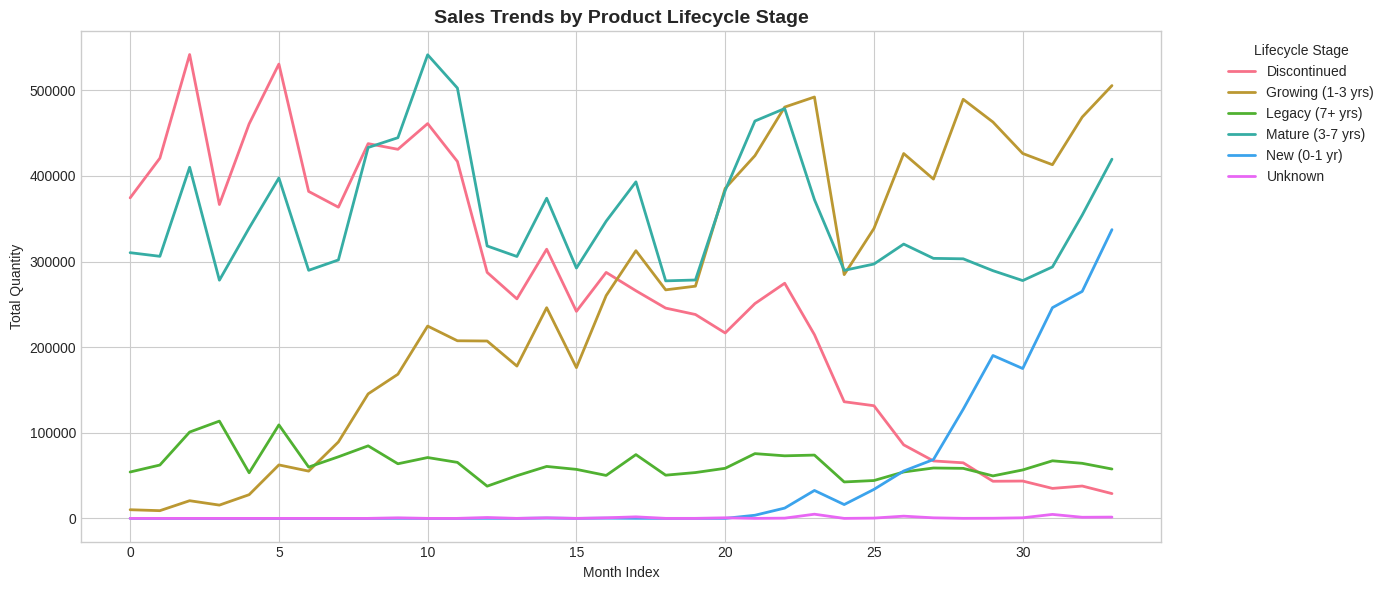

In [227]:
# 8.5 Lifecycle Stage Trends
lifecycle_trends = df_lifecycle.groupby(['year_month', 'lifecycle_stage'])['quantity'].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))

for stage in lifecycle_trends.columns:
    ax.plot(range(len(lifecycle_trends)), lifecycle_trends[stage], label=stage, linewidth=2)

ax.set_xlabel('Month Index')
ax.set_ylabel('Total Quantity')
ax.set_title('Sales Trends by Product Lifecycle Stage', fontsize=14, fontweight='bold')
ax.legend(title='Lifecycle Stage', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


📊 New Product Performance (Launched in last 2 years):
   Number of new products: 4,255
   New products with sales: 2,645

   Sales Statistics:


count     2645.00
mean      2150.70
std       5585.70
min        -21.00
25%        196.00
50%        692.00
75%       1931.00
max     132742.00
Name: quantity, dtype: float64

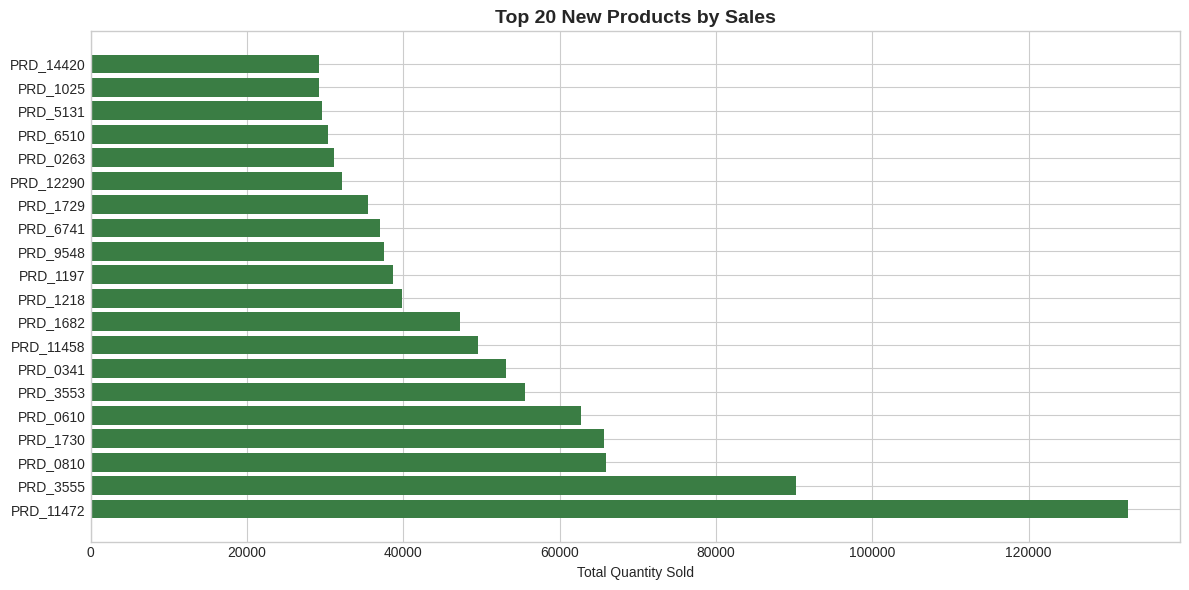

In [228]:
# 8.6 New Product Performance Analysis
# Identify products launched in the last 2 years
two_years_ago = current_date - pd.Timedelta(days=730)
new_products = product_master[product_master['start_production_date'] >= two_years_ago]['product_code'].tolist()

new_product_sales = df[df['product_code'].isin(new_products)].groupby('product_code')['quantity'].sum()
new_product_summary = new_product_sales.describe()

print("📊 New Product Performance (Launched in last 2 years):")
print(f"   Number of new products: {len(new_products):,}")
print(f"   New products with sales: {len(new_product_sales):,}")
print(f"\n   Sales Statistics:")
display(new_product_summary)

# Top performing new products
fig, ax = plt.subplots(figsize=(12, 6))
top_new_products = new_product_sales.nlargest(20)
ax.barh(range(len(top_new_products)), top_new_products.values, color=COLORS['success'])
ax.set_yticks(range(len(top_new_products)))
ax.set_yticklabels(top_new_products.index)
ax.set_xlabel('Total Quantity Sold')
ax.set_title('Top 20 New Products by Sales', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


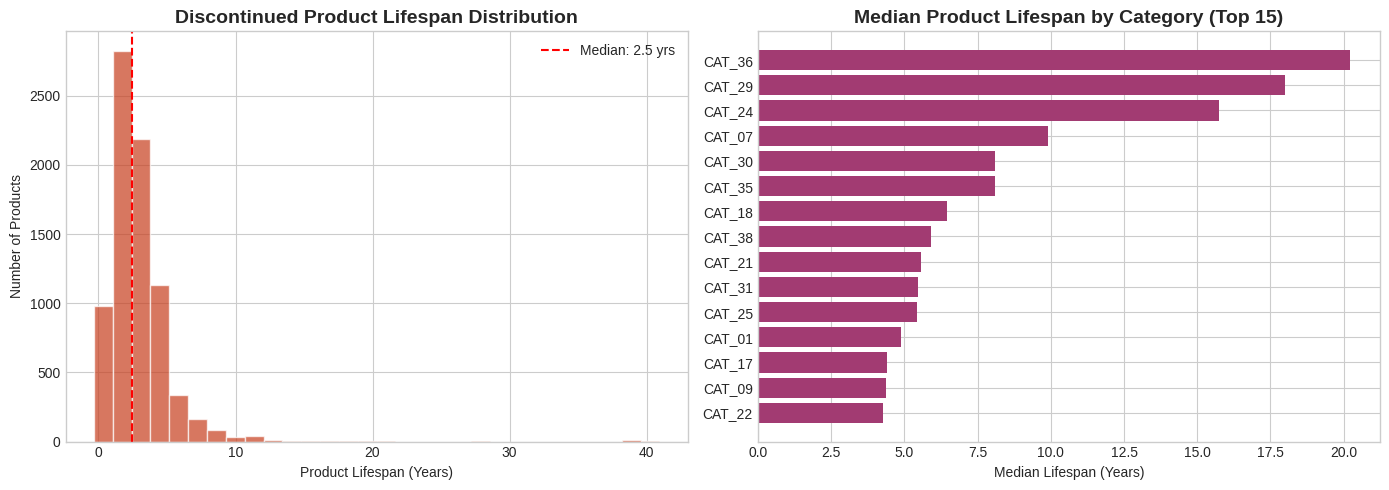


📊 Discontinued Product Lifespan Statistics:
   Mean lifespan: 2.89 years
   Median lifespan: 2.47 years
   Min lifespan: -0.34 years
   Max lifespan: 40.93 years


In [229]:
# 8.7 Product Lifespan Analysis (for discontinued products)
if len(discontinued) > 0:
    discontinued['lifespan_years'] = (
        discontinued['end_production_date'] - discontinued['start_production_date']
    ).dt.days / 365.25
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Lifespan distribution
    axes[0].hist(discontinued['lifespan_years'].dropna(), bins=30, 
                 color=COLORS['quaternary'], edgecolor='white', alpha=0.7)
    axes[0].set_xlabel('Product Lifespan (Years)')
    axes[0].set_ylabel('Number of Products')
    axes[0].set_title('Discontinued Product Lifespan Distribution', fontsize=14, fontweight='bold')
    axes[0].axvline(discontinued['lifespan_years'].median(), color='red', linestyle='--',
                   label=f"Median: {discontinued['lifespan_years'].median():.1f} yrs")
    axes[0].legend()
    
    # Lifespan by category
    discontinued_with_cat = discontinued.merge(
        df[['product_code', 'category']].drop_duplicates(), 
        on='product_code', how='left'
    ).drop("category_y", axis=1).rename(columns={"category_x": "category"})
    cat_lifespan = discontinued_with_cat.groupby('category')['lifespan_years'].median().sort_values(ascending=False)
    
    axes[1].barh(cat_lifespan.head(15).index[::-1], cat_lifespan.head(15).values[::-1], 
                 color=COLORS['secondary'])
    axes[1].set_xlabel('Median Lifespan (Years)')
    axes[1].set_title('Median Product Lifespan by Category (Top 15)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Discontinued Product Lifespan Statistics:")
    print(f"   Mean lifespan: {discontinued['lifespan_years'].mean():.2f} years")
    print(f"   Median lifespan: {discontinued['lifespan_years'].median():.2f} years")
    print(f"   Min lifespan: {discontinued['lifespan_years'].min():.2f} years")
    print(f"   Max lifespan: {discontinued['lifespan_years'].max():.2f} years")


In [230]:
discontinued_with_cat

,product_code,category,business_line_code,business_line,sector,structure_code,factory,brand,start_production_date,end_production_date,product_age_days,product_age_months,product_age_years,is_discontinued,is_active,lifespan_years
0,PRD_7747,CAT_01,BLC_01,BL_01,SECTOR_01,STR_01,FACTORY_01,BRAND_01,2022-05-25,2024-03-18,860.00,28.25,2.35,True,False,1.82
1,PRD_12705,CAT_02,BLC_02,BL_02,SECTOR_02,STR_02,FACTORY_02,BRAND_02,2013-12-17,2016-12-01,3941.00,129.47,10.79,True,False,2.96
2,PRD_13060,CAT_03,BLC_02,BL_02,SECTOR_03,STR_03,FACTORY_03,BRAND_02,NaT,2020-10-05,NaN,NaN,NaN,True,False,NaN
3,PRD_8689,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2016-03-30,2018-01-26,3107.00,102.07,8.51,True,False,1.83
4,PRD_13150,CAT_04,BLC_02,BL_03,SECTOR_03,STR_03,FACTORY_04,BRAND_02,2016-03-30,2018-01-26,3107.00,102.07,8.51,True,False,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7967,PRD_0419,CAT_15,BLC_03,BL_07,SECTOR_02,STR_04,FACTORY_01,BRAND_05,2020-08-31,2023-10-10,1492.00,49.01,4.08,True,False,3.11
7968,PRD_0420,CAT_15,BLC_03,BL_07,SECTOR_02,STR_04,FACTORY_01,BRAND_05,2020-08-30,2023-10-10,1493.00,49.05,4.09,True,False,3.11
7969,PRD_0830,CAT_10,BLC_03,BL_06,SECTOR_04,STR_49,FACTORY_01,BRAND_05,2019-05-13,2023-11-23,1968.00,64.65,5.39,True,False,4.53
7970,PRD_0873,CAT_10,BLC_03,BL_06,SECTOR_04,STR_15,FACTORY_16,BRAND_03,2021-07-12,2023-12-20,1177.00,38.67,3.22,True,False,2.44


## 9. Missing Data & Zero Sales Analysis


In [231]:
# 9.1 Create Complete Grid for Analysis
def analyze_missing_sales(df, level='sku'):
    """Analyze missing/zero sales at different hierarchy levels"""
    
    date_range = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='MS')
    
    if level == 'sku':
        group_cols = ['market', 'product_code']
    elif level == 'category':
        group_cols = ['market', 'category']
    elif level == 'brand':
        group_cols = ['market', 'brand']
    else:
        group_cols = ['market', 'product_code']
    
    # Get unique combinations
    unique_combos = df[group_cols].drop_duplicates()
    
    # Calculate expected vs actual
    n_periods = len(date_range)
    n_combos = len(unique_combos)
    expected_records = n_periods * n_combos
    actual_records = len(df.groupby(group_cols + ['date']).size())
    missing_records = expected_records - actual_records
    
    return {
        'level': level,
        'unique_combinations': n_combos,
        'time_periods': n_periods,
        'expected_records': expected_records,
        'actual_records': actual_records,
        'missing_records': missing_records,
        'missing_pct': (missing_records / expected_records) * 100,
        'sparsity': 1 - (actual_records / expected_records)
    }

# Analyze at different levels
levels = ['sku', 'category', 'brand']
sparsity_analysis = []

for level in levels:
    try:
        result = analyze_missing_sales(df, level)
        sparsity_analysis.append(result)
        print(f"\n📊 Sparsity Analysis - {level.upper()} Level:")
        print(f"   Unique combinations: {result['unique_combinations']:,}")
        print(f"   Time periods: {result['time_periods']}")
        print(f"   Expected records: {result['expected_records']:,}")
        print(f"   Actual records: {result['actual_records']:,}")
        print(f"   Missing records: {result['missing_records']:,}")
        print(f"   Sparsity: {result['sparsity']*100:.2f}%")
    except Exception as e:
        print(f"⚠️ Error analyzing {level}: {e}")



📊 Sparsity Analysis - SKU Level:
   Unique combinations: 20,148
   Time periods: 34
   Expected records: 685,032
   Actual records: 278,901
   Missing records: 406,131
   Sparsity: 59.29%

📊 Sparsity Analysis - CATEGORY Level:
   Unique combinations: 685
   Time periods: 34
   Expected records: 23,290
   Actual records: 16,354
   Missing records: 6,936
   Sparsity: 29.78%

📊 Sparsity Analysis - BRAND Level:
   Unique combinations: 114
   Time periods: 34
   Expected records: 3,876
   Actual records: 2,986
   Missing records: 890
   Sparsity: 22.96%


📊 Zero vs Non-Zero Sales:
   Total records: 278,901
   Zero quantity records: 410 (0.15%)
   Non-zero records: 256,466 (91.96%)


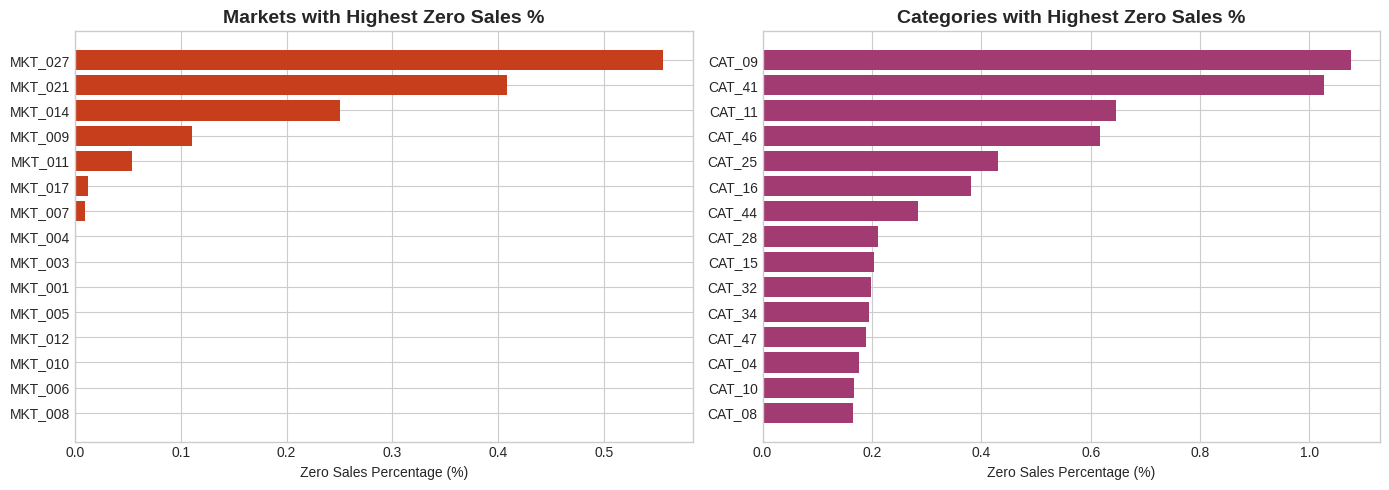

In [232]:
# 9.2 Zero Sales Analysis
zero_sales = df[df['quantity'] == 0]
non_zero_sales = df[df['quantity'] > 0]

print("📊 Zero vs Non-Zero Sales:")
print(f"   Total records: {len(df):,}")
print(f"   Zero quantity records: {len(zero_sales):,} ({len(zero_sales)/len(df)*100:.2f}%)")
print(f"   Non-zero records: {len(non_zero_sales):,} ({len(non_zero_sales)/len(df)*100:.2f}%)")

# Zero sales by market
zero_by_market = df.groupby('market').apply(
    lambda x: (x['quantity'] == 0).sum() / len(x) * 100
).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Top markets by zero sales percentage
axes[0].barh(zero_by_market.head(15).index[::-1], zero_by_market.head(15).values[::-1], 
             color=COLORS['quaternary'])
axes[0].set_xlabel('Zero Sales Percentage (%)')
axes[0].set_title('Markets with Highest Zero Sales %', fontsize=14, fontweight='bold')

# Zero sales by category
zero_by_category = df.groupby('category').apply(
    lambda x: (x['quantity'] == 0).sum() / len(x) * 100
).sort_values(ascending=False)

axes[1].barh(zero_by_category.head(15).index[::-1], zero_by_category.head(15).values[::-1], 
             color=COLORS['secondary'])
axes[1].set_xlabel('Zero Sales Percentage (%)')
axes[1].set_title('Categories with Highest Zero Sales %', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [233]:
# 9.3 SKU Activity Analysis
sku_activity = df.groupby('product_code').agg({
    'quantity': ['sum', 'mean', 'count', lambda x: (x == 0).sum()],
    'date': ['min', 'max', 'nunique'],
    'market': 'nunique'
})
sku_activity.columns = ['Total Qty', 'Mean Qty', 'Records', 'Zero Count', 
                         'First Sale', 'Last Sale', 'Active Months', 'Markets']

# Calculate activity metrics
date_range_months = (df['date'].max() - df['date'].min()).days / 30.44
sku_activity['Activity Rate'] = (sku_activity['Active Months'] / date_range_months * 100).round(2)
sku_activity['Zero Rate'] = (sku_activity['Zero Count'] / sku_activity['Records'] * 100).round(2)

print("📊 SKU Activity Summary:")
print(f"   Total SKUs: {len(sku_activity):,}")
print(f"   SKUs with 100% activity: {(sku_activity['Activity Rate'] >= 95).sum():,}")
print(f"   SKUs with <50% activity: {(sku_activity['Activity Rate'] < 50).sum():,}")
print(f"   SKUs with >50% zero sales: {(sku_activity['Zero Rate'] > 50).sum():,}")


📊 SKU Activity Summary:
   Total SKUs: 8,705
   SKUs with 100% activity: 1,493
   SKUs with <50% activity: 4,706
   SKUs with >50% zero sales: 0


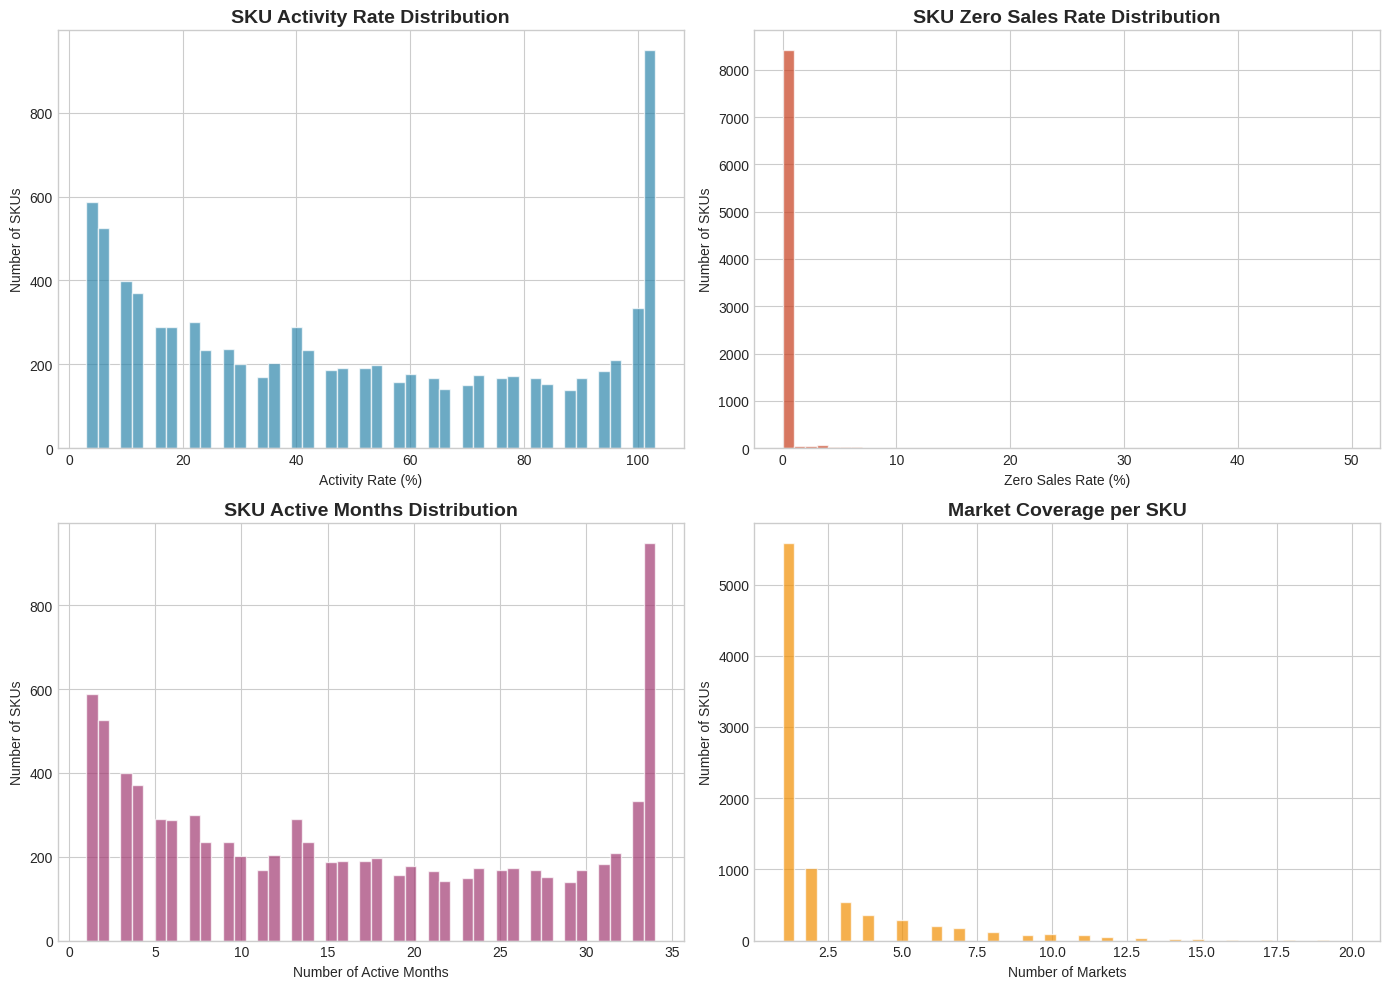

In [234]:
# 9.4 Activity Rate Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Activity rate distribution
axes[0, 0].hist(sku_activity['Activity Rate'], bins=50, color=COLORS['primary'], 
                edgecolor='white', alpha=0.7)
axes[0, 0].set_xlabel('Activity Rate (%)')
axes[0, 0].set_ylabel('Number of SKUs')
axes[0, 0].set_title('SKU Activity Rate Distribution', fontsize=14, fontweight='bold')

# Zero rate distribution
axes[0, 1].hist(sku_activity['Zero Rate'], bins=50, color=COLORS['quaternary'], 
                edgecolor='white', alpha=0.7)
axes[0, 1].set_xlabel('Zero Sales Rate (%)')
axes[0, 1].set_ylabel('Number of SKUs')
axes[0, 1].set_title('SKU Zero Sales Rate Distribution', fontsize=14, fontweight='bold')

# Active months distribution
axes[1, 0].hist(sku_activity['Active Months'], bins=50, color=COLORS['secondary'], 
                edgecolor='white', alpha=0.7)
axes[1, 0].set_xlabel('Number of Active Months')
axes[1, 0].set_ylabel('Number of SKUs')
axes[1, 0].set_title('SKU Active Months Distribution', fontsize=14, fontweight='bold')

# Markets per SKU distribution
axes[1, 1].hist(sku_activity['Markets'], bins=50, color=COLORS['tertiary'], 
                edgecolor='white', alpha=0.7)
axes[1, 1].set_xlabel('Number of Markets')
axes[1, 1].set_ylabel('Number of SKUs')
axes[1, 1].set_title('Market Coverage per SKU', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

📊 SKU Demand Pattern Classification:


Demand Pattern
Sporadic        4094
Smooth          1844
Intermittent    1793
Regular          974
Name: count, dtype: int64

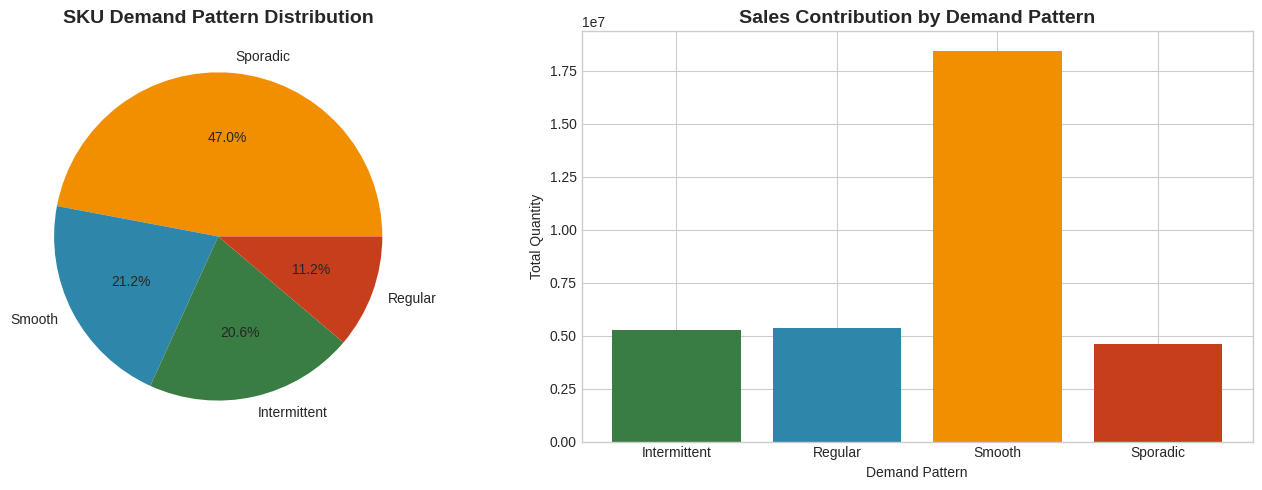

In [235]:
# 9.5 Intermittent Demand Classification
def classify_demand(row):
    """Classify SKU demand pattern"""
    if row['Activity Rate'] >= 90 and row['Zero Rate'] < 10:
        return 'Smooth'
    elif row['Activity Rate'] >= 70 and row['Zero Rate'] < 30:
        return 'Regular'
    elif row['Activity Rate'] >= 40:
        return 'Intermittent'
    else:
        return 'Sporadic'

sku_activity['Demand Pattern'] = sku_activity.apply(classify_demand, axis=1)

demand_pattern_summary = sku_activity['Demand Pattern'].value_counts()
print("📊 SKU Demand Pattern Classification:")
display(demand_pattern_summary)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
axes[0].pie(demand_pattern_summary, labels=demand_pattern_summary.index, autopct='%1.1f%%',
           colors=[COLORS['tertiary'], COLORS['primary'], COLORS['success'], COLORS['quaternary']])
axes[0].set_title('SKU Demand Pattern Distribution', fontsize=14, fontweight='bold')

# Sales contribution by pattern
pattern_sales = sku_activity.groupby('Demand Pattern')['Total Qty'].sum()
axes[1].bar(pattern_sales.index, pattern_sales.values, 
           color=[COLORS['success'], COLORS['primary'], COLORS['tertiary'], COLORS['quaternary']])
axes[1].set_xlabel('Demand Pattern')
axes[1].set_ylabel('Total Quantity')
axes[1].set_title('Sales Contribution by Demand Pattern', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 10. Correlation & Statistical Analysis


In [236]:
# 10.1 Create Aggregated Features for Correlation
# Aggregate at SKU level
sku_features = df.groupby('product_code').agg({
    'quantity': ['sum', 'mean', 'std', 'min', 'max'],
    'market': 'nunique',
    'date': 'nunique'
}).reset_index()
sku_features.columns = ['product_code', 'total_qty', 'mean_qty', 'std_qty', 
                         'min_qty', 'max_qty', 'n_markets', 'n_months']

# Merge with product master
sku_features = sku_features.merge(product_master, on='product_code', how='left')

# Calculate coefficient of variation
sku_features['cv'] = sku_features['std_qty'] / sku_features['mean_qty']
sku_features['cv'] = sku_features['cv'].replace([np.inf, -np.inf], np.nan)

print("📊 SKU Features Created:")
display(sku_features.head())


📊 SKU Features Created:


,product_code,total_qty,mean_qty,std_qty,min_qty,max_qty,n_markets,n_months,category,business_line_code,business_line,sector,structure_code,factory,brand,start_production_date,end_production_date,product_age_days,product_age_months,product_age_years,is_discontinued,is_active,lifecycle_stage,cv
0,PRD_0010,42413,1247.44,770.62,104,3423,1,34,CAT_12,BLC_03,BL_07,SECTOR_02,STR_19,FACTORY_01,BRAND_03,2017-07-19,NaT,2631.00,86.43,7.20,False,True,Legacy (7+ yrs),0.62
1,PRD_0011,12889,379.09,237.02,70,1047,1,34,CAT_12,BLC_03,BL_07,SECTOR_02,STR_02,FACTORY_01,BRAND_03,2017-07-19,NaT,2631.00,86.43,7.20,False,True,Legacy (7+ yrs),0.63
2,PRD_0013,10336,313.21,242.14,-3,955,1,33,CAT_12,BLC_03,BL_07,SECTOR_02,STR_15,FACTORY_01,BRAND_03,2018-11-05,NaT,2157.00,70.86,5.91,False,True,Mature (3-7 yrs),0.77
3,PRD_0014,7605,237.66,169.10,-7,620,1,32,CAT_12,BLC_03,BL_07,SECTOR_02,STR_15,FACTORY_01,BRAND_03,2018-09-10,NaT,2213.00,72.70,6.06,False,True,Mature (3-7 yrs),0.71
4,PRD_0015,15405,481.41,321.59,-2,1071,1,32,CAT_12,BLC_03,BL_07,SECTOR_02,STR_42,FACTORY_01,BRAND_03,2018-07-16,NaT,2269.00,74.54,6.21,False,True,Mature (3-7 yrs),0.67


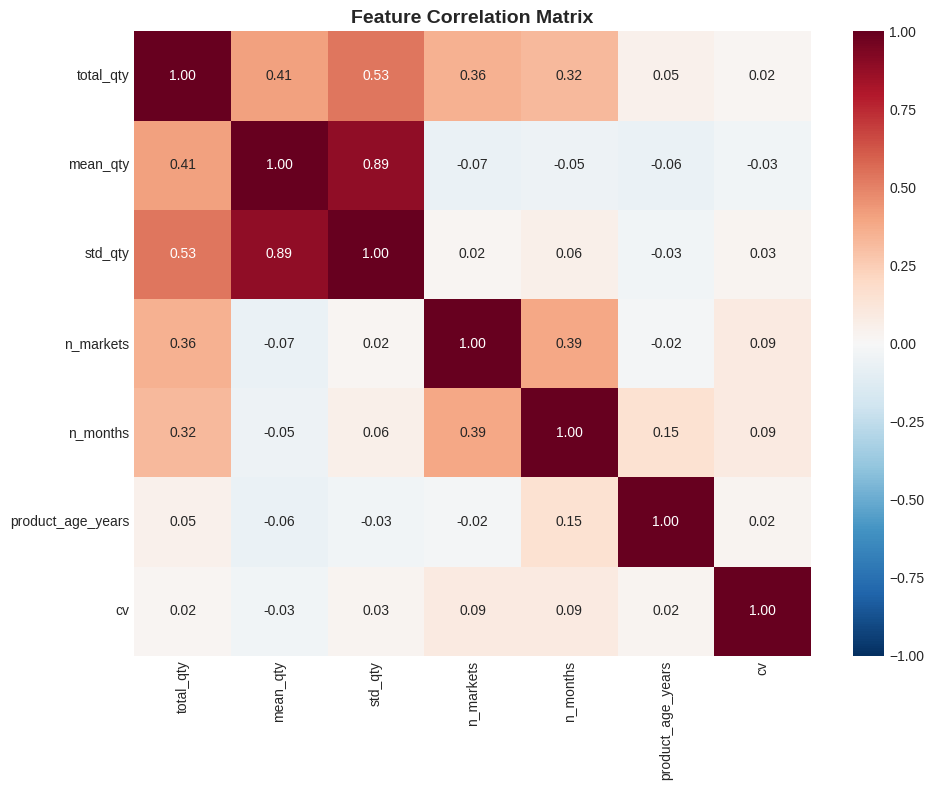

In [237]:
# 10.2 Numerical Correlations
numerical_cols = ['total_qty', 'mean_qty', 'std_qty', 'n_markets', 'n_months', 
                  'product_age_years', 'cv']

# Filter columns that exist
numerical_cols = [col for col in numerical_cols if col in sku_features.columns]

correlation_matrix = sku_features[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', ax=ax, vmin=-1, vmax=1)
ax.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


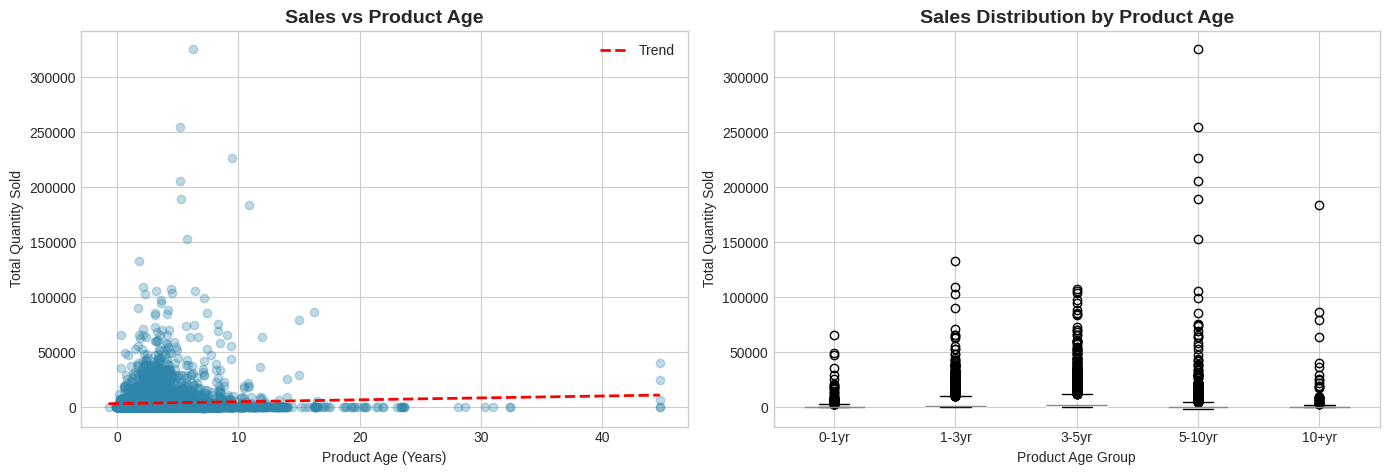

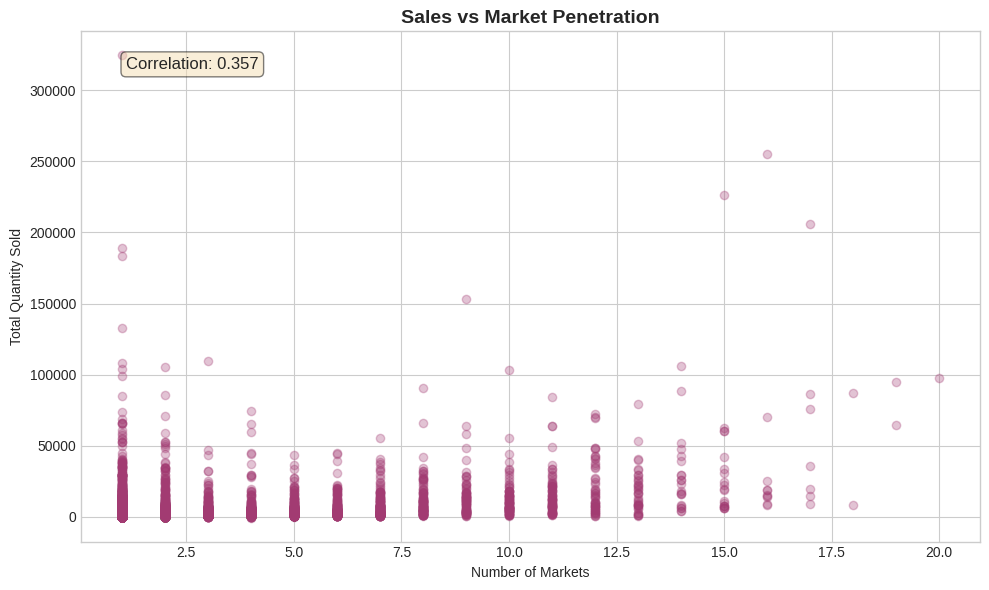

📊 Kruskal-Wallis Test - Market Differences:
   H-statistic: 7432.2409
   P-value: 0.0000e+00
   Significant difference: Yes (α=0.05)

📊 Kruskal-Wallis Test - Category Differences:
   H-statistic: 2443.4595
   P-value: 0.0000e+00
   Significant difference: Yes (α=0.05)


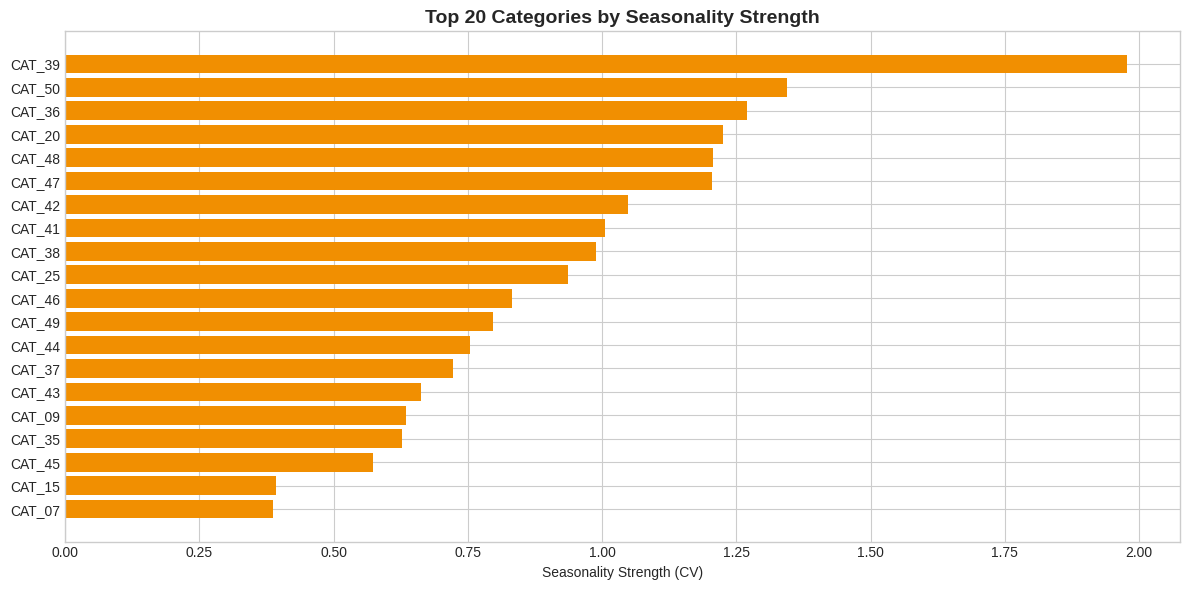


📊 Most Seasonal Categories:


category
CAT_39   1.98
CAT_50   1.34
CAT_36   1.27
CAT_20   1.23
CAT_48   1.21
CAT_47   1.20
CAT_42   1.05
CAT_41   1.01
CAT_38   0.99
CAT_25   0.94
dtype: float64


📊 Least Seasonal Categories:


category
CAT_04   0.14
CAT_21   0.13
CAT_10   0.13
CAT_12   0.13
CAT_03   0.13
CAT_02   0.12
CAT_08   0.12
CAT_06   0.12
CAT_13   0.12
CAT_18    NaN
dtype: float64

In [238]:
# 10.3 Sales vs Product Age Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(sku_features['product_age_years'], sku_features['total_qty'], 
               alpha=0.3, color=COLORS['primary'])
axes[0].set_xlabel('Product Age (Years)')
axes[0].set_ylabel('Total Quantity Sold')
axes[0].set_title('Sales vs Product Age', fontsize=14, fontweight='bold')

# Add trend line
valid_data = sku_features[['product_age_years', 'total_qty']].dropna()
if len(valid_data) > 10:
    z = np.polyfit(valid_data['product_age_years'], valid_data['total_qty'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(valid_data['product_age_years'].min(), 
                         valid_data['product_age_years'].max(), 100)
    axes[0].plot(x_line, p(x_line), "r--", linewidth=2, label='Trend')
    axes[0].legend()

# Box plot by age groups
sku_features['age_group'] = pd.cut(sku_features['product_age_years'], 
                                    bins=[0, 1, 3, 5, 10, 100],
                                    labels=['0-1yr', '1-3yr', '3-5yr', '5-10yr', '10+yr'])

age_group_order = ['0-1yr', '1-3yr', '3-5yr', '5-10yr', '10+yr']
sku_features.boxplot(column='total_qty', by='age_group', ax=axes[1], 
                      positions=range(len(age_group_order)))
axes[1].set_xlabel('Product Age Group')
axes[1].set_ylabel('Total Quantity Sold')
axes[1].set_title('Sales Distribution by Product Age', fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

# %%
# 10.4 Market Penetration vs Sales
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(sku_features['n_markets'], sku_features['total_qty'], 
          alpha=0.3, color=COLORS['secondary'])
ax.set_xlabel('Number of Markets')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Sales vs Market Penetration', fontsize=14, fontweight='bold')

# Correlation coefficient
corr = sku_features['n_markets'].corr(sku_features['total_qty'])
ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# %%
# 10.5 Statistical Tests - Market Differences
from scipy.stats import kruskal, f_oneway, mannwhitneyu

# Kruskal-Wallis Test for market differences
top_markets_list = market_summary.head(10).index.tolist()
market_groups = [df[df['market'] == m]['quantity'].values for m in top_markets_list]

try:
    stat, p_value = kruskal(*market_groups)
    print("📊 Kruskal-Wallis Test - Market Differences:")
    print(f"   H-statistic: {stat:.4f}")
    print(f"   P-value: {p_value:.4e}")
    print(f"   Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
except Exception as e:
    print(f"⚠️ Test failed: {e}")

# %%
# 10.6 Statistical Tests - Category Differences
top_categories_list = category_summary.head(10).index.tolist()
category_groups = [df[df['category'] == c]['quantity'].values for c in top_categories_list]

try:
    stat, p_value = kruskal(*category_groups)
    print("\n📊 Kruskal-Wallis Test - Category Differences:")
    print(f"   H-statistic: {stat:.4f}")
    print(f"   P-value: {p_value:.4e}")
    print(f"   Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")
except Exception as e:
    print(f"⚠️ Test failed: {e}")

# %%
# 10.7 Seasonality Strength by Category
def calculate_seasonality_strength(group):
    """Calculate coefficient of variation across months as seasonality proxy"""
    monthly_avg = group.groupby('month')['quantity'].mean()
    if monthly_avg.mean() > 0:
        return monthly_avg.std() / monthly_avg.mean()
    return np.nan

seasonality_by_category = df.groupby('category').apply(calculate_seasonality_strength)
seasonality_by_category = seasonality_by_category.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
top_seasonal = seasonality_by_category.head(20)
ax.barh(top_seasonal.index[::-1], top_seasonal.values[::-1], color=COLORS['tertiary'])
ax.set_xlabel('Seasonality Strength (CV)')
ax.set_title('Top 20 Categories by Seasonality Strength', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Most Seasonal Categories:")
display(seasonality_by_category.head(10))

print("\n📊 Least Seasonal Categories:")
display(seasonality_by_category.tail(10))


📊 Pareto Analysis (80/20 Rule):
   Total SKUs: 8,705
   SKUs contributing to 80% of sales: 1,844
   Percentage of SKUs for 80% sales: 21.18%


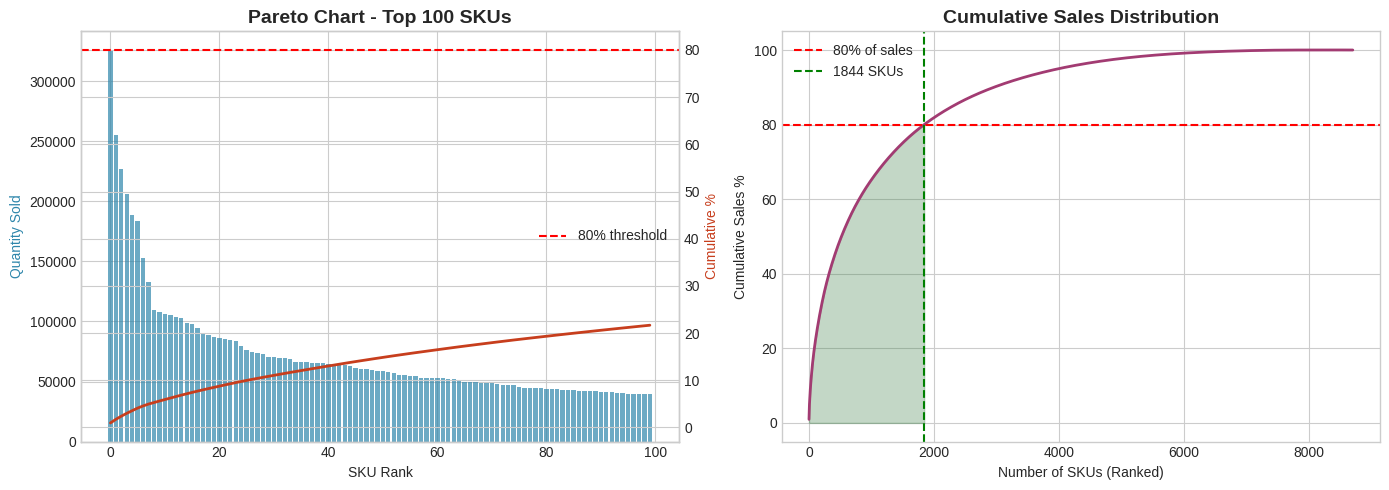

In [239]:
# 10.8 Pareto Analysis (80/20 Rule)
# SKU Level
sku_sales = df.groupby('product_code')['quantity'].sum().sort_values(ascending=False)
sku_sales_cumsum = sku_sales.cumsum()
sku_sales_cumsum_pct = sku_sales_cumsum / sku_sales.sum() * 100

# Find 80% threshold
skus_for_80 = (sku_sales_cumsum_pct <= 80).sum()
pct_skus_for_80 = skus_for_80 / len(sku_sales) * 100

print("📊 Pareto Analysis (80/20 Rule):")
print(f"   Total SKUs: {len(sku_sales):,}")
print(f"   SKUs contributing to 80% of sales: {skus_for_80:,}")
print(f"   Percentage of SKUs for 80% sales: {pct_skus_for_80:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pareto chart
ax1 = axes[0]
ax2 = ax1.twinx()

# Limit to top 100 SKUs for visualization
top_100_skus = sku_sales.head(100)
top_100_cumsum = top_100_skus.cumsum() / sku_sales.sum() * 100

ax1.bar(range(len(top_100_skus)), top_100_skus.values, color=COLORS['primary'], alpha=0.7)
ax2.plot(range(len(top_100_skus)), top_100_cumsum.values, color=COLORS['quaternary'], 
         linewidth=2, marker='')
ax2.axhline(y=80, color='red', linestyle='--', label='80% threshold')

ax1.set_xlabel('SKU Rank')
ax1.set_ylabel('Quantity Sold', color=COLORS['primary'])
ax2.set_ylabel('Cumulative %', color=COLORS['quaternary'])
ax1.set_title('Pareto Chart - Top 100 SKUs', fontsize=14, fontweight='bold')
ax2.legend(loc='center right')

# Cumulative distribution
axes[1].plot(range(len(sku_sales_cumsum_pct)), sku_sales_cumsum_pct.values, 
            color=COLORS['secondary'], linewidth=2)
axes[1].axhline(y=80, color='red', linestyle='--', label='80% of sales')
axes[1].axvline(x=skus_for_80, color='green', linestyle='--', label=f'{skus_for_80} SKUs')
axes[1].fill_between(range(skus_for_80), sku_sales_cumsum_pct.values[:skus_for_80], 
                     alpha=0.3, color=COLORS['success'])
axes[1].set_xlabel('Number of SKUs (Ranked)')
axes[1].set_ylabel('Cumulative Sales %')
axes[1].set_title('Cumulative Sales Distribution', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()


📊 ABC Classification Summary:


,SKU Count,Total Quantity,% SKUs,% Quantity
ABC_class,,,,
A,1844,26921830,21.18,80.00
B,2154,5048766,24.74,15.00
C,4707,1683089,54.07,5.00


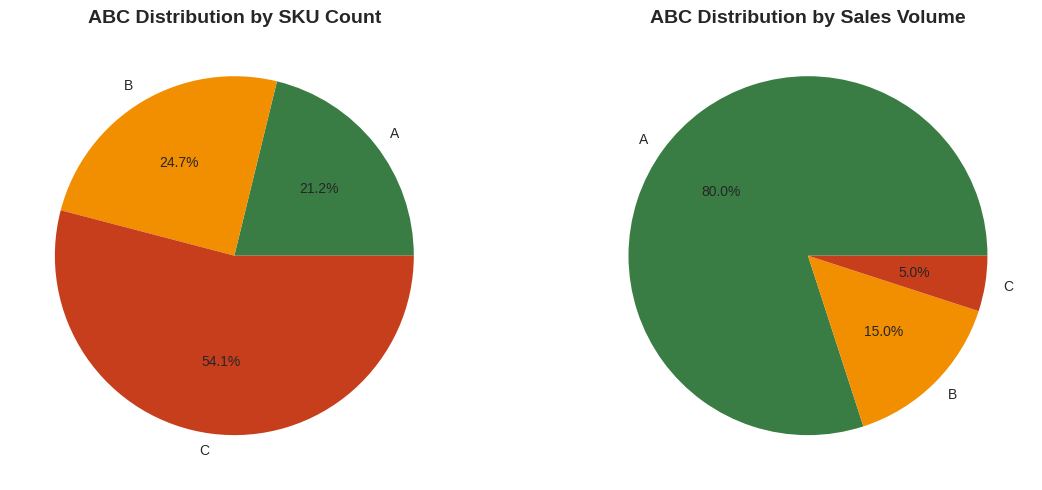

In [240]:
# 10.9 ABC Classification
def abc_classification(cumsum_pct):
    if cumsum_pct <= 80:
        return 'A'
    elif cumsum_pct <= 95:
        return 'B'
    else:
        return 'C'

sku_abc = pd.DataFrame({
    'product_code': sku_sales.index,
    'quantity': sku_sales.values,
    'cumsum_pct': sku_sales_cumsum_pct.values
})
sku_abc['ABC_class'] = sku_abc['cumsum_pct'].apply(abc_classification)

abc_summary = sku_abc.groupby('ABC_class').agg({
    'product_code': 'count',
    'quantity': 'sum'
})
abc_summary.columns = ['SKU Count', 'Total Quantity']
abc_summary['% SKUs'] = (abc_summary['SKU Count'] / abc_summary['SKU Count'].sum() * 100).round(2)
abc_summary['% Quantity'] = (abc_summary['Total Quantity'] / abc_summary['Total Quantity'].sum() * 100).round(2)

print("📊 ABC Classification Summary:")
display(abc_summary)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors_abc = {'A': COLORS['success'], 'B': COLORS['tertiary'], 'C': COLORS['quaternary']}

axes[0].pie(abc_summary['SKU Count'], labels=abc_summary.index, autopct='%1.1f%%',
           colors=[colors_abc[x] for x in abc_summary.index])
axes[0].set_title('ABC Distribution by SKU Count', fontsize=14, fontweight='bold')

axes[1].pie(abc_summary['Total Quantity'], labels=abc_summary.index, autopct='%1.1f%%',
           colors=[colors_abc[x] for x in abc_summary.index])
axes[1].set_title('ABC Distribution by Sales Volume', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


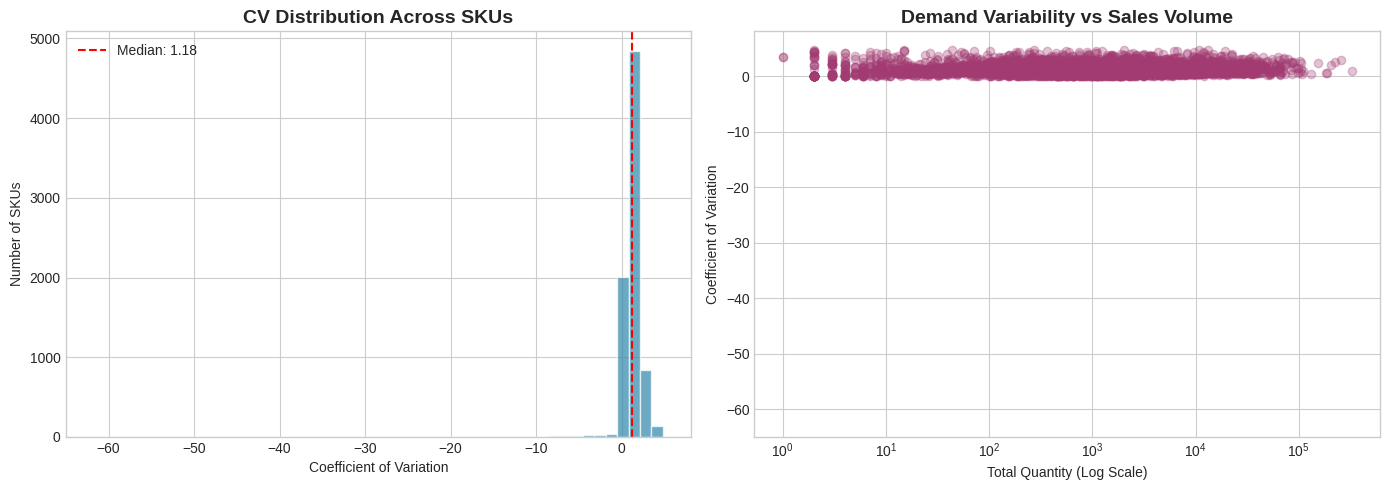

In [241]:
# 10.10 Coefficient of Variation Analysis
cv_analysis = sku_features[['product_code', 'cv', 'total_qty', 'mean_qty']].dropna()
cv_analysis = cv_analysis[cv_analysis['cv'] < cv_analysis['cv'].quantile(0.99)]  # Remove outliers

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CV Distribution
axes[0].hist(cv_analysis['cv'], bins=50, color=COLORS['primary'], 
             edgecolor='white', alpha=0.7)
axes[0].set_xlabel('Coefficient of Variation')
axes[0].set_ylabel('Number of SKUs')
axes[0].set_title('CV Distribution Across SKUs', fontsize=14, fontweight='bold')
axes[0].axvline(cv_analysis['cv'].median(), color='red', linestyle='--', 
               label=f"Median: {cv_analysis['cv'].median():.2f}")
axes[0].legend()

# CV vs Sales Volume
axes[1].scatter(cv_analysis['total_qty'], cv_analysis['cv'], alpha=0.3, color=COLORS['secondary'])
axes[1].set_xlabel('Total Quantity (Log Scale)')
axes[1].set_ylabel('Coefficient of Variation')
axes[1].set_title('Demand Variability vs Sales Volume', fontsize=14, fontweight='bold')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()


## 11. Key Insights Summary


In [242]:
# 11.1 Generate Summary Statistics
print("=" * 80)
print("📊 EXECUTIVE SUMMARY - KEY INSIGHTS")
print("=" * 80)

print("\n" + "=" * 40)
print("📈 DATA OVERVIEW")
print("=" * 40)
print(f"• Date Range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
print(f"• Total Records: {len(df):,}")
print(f"• Unique Markets: {df['market'].nunique():,}")
print(f"• Unique SKUs: {df['product_code'].nunique():,}")
print(f"• Unique Categories: {df['category'].nunique():,}")
print(f"• Total Quantity Sold: {df['quantity'].sum():,.0f}")

print("\n" + "=" * 40)
print("🏪 TOP PERFORMERS")
print("=" * 40)
print(f"• Top Market: {market_summary.index[0]} ({market_summary['% of Total'].iloc[0]:.1f}% of sales)")
print(f"• Top Category: {category_summary.index[0]} ({category_summary['% of Total'].iloc[0]:.1f}% of sales)")
print(f"• Top Brand: {brand_summary.index[0]} ({brand_summary['% of Total'].iloc[0]:.1f}% of sales)")

print("\n" + "=" * 40)
print("📅 SEASONALITY INSIGHTS")
print("=" * 40)
monthly_avg = df.groupby('month')['quantity'].mean()
peak_month = monthly_avg.idxmax()
low_month = monthly_avg.idxmin()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
print(f"• Peak Month: {month_names[peak_month-1]} (Avg: {monthly_avg[peak_month]:,.0f})")
print(f"• Lowest Month: {month_names[low_month-1]} (Avg: {monthly_avg[low_month]:,.0f})")
print(f"• Seasonal Variation: {((monthly_avg.max() - monthly_avg.min()) / monthly_avg.mean() * 100):.1f}%")

print("\n" + "=" * 40)
print("📦 PRODUCT PORTFOLIO")
print("=" * 40)
print(f"• Active Products: {product_master['is_active'].sum():,}")
print(f"• Discontinued Products: {product_master['is_discontinued'].sum():,}")
print(f"• Avg Product Age: {product_master['product_age_years'].mean():.1f} years")
print(f"• New Products (< 1 year): {(product_master['product_age_years'] < 1).sum():,}")

print("\n" + "=" * 40)
print("📊 PARETO ANALYSIS")
print("=" * 40)
print(f"• {pct_skus_for_80:.1f}% of SKUs contribute to 80% of sales")
print(f"• A-class SKUs: {abc_summary.loc['A', 'SKU Count']:,} ({abc_summary.loc['A', '% SKUs']:.1f}%)")
print(f"• B-class SKUs: {abc_summary.loc['B', 'SKU Count']:,} ({abc_summary.loc['B', '% SKUs']:.1f}%)")
print(f"• C-class SKUs: {abc_summary.loc['C', 'SKU Count']:,} ({abc_summary.loc['C', '% SKUs']:.1f}%)")

print("\n" + "=" * 40)
print("⚠️ DATA QUALITY NOTES")
print("=" * 40)
print(f"• Missing values in train: {train.isnull().sum().sum():,}")
print(f"• Zero quantity records: {(df['quantity'] == 0).sum():,} ({(df['quantity'] == 0).sum()/len(df)*100:.2f}%)")


📊 EXECUTIVE SUMMARY - KEY INSIGHTS

📈 DATA OVERVIEW
• Date Range: 2022-01-01 to 2024-10-01
• Total Records: 278,901
• Unique Markets: 27
• Unique SKUs: 8,705
• Unique Categories: 45
• Total Quantity Sold: 33,653,685

🏪 TOP PERFORMERS
• Top Market: MKT_014 (19.5% of sales)
• Top Category: CAT_12 (28.6% of sales)
• Top Brand: BRAND_03 (49.4% of sales)

📅 SEASONALITY INSIGHTS
• Peak Month: Nov (Avg: 149)
• Lowest Month: Apr (Avg: 102)
• Seasonal Variation: 38.6%

📦 PRODUCT PORTFOLIO
• Active Products: 6,379
• Discontinued Products: 7,972
• Avg Product Age: 4.4 years
• New Products (< 1 year): 2,853

📊 PARETO ANALYSIS
• 21.2% of SKUs contribute to 80% of sales
• A-class SKUs: 1,844 (21.2%)
• B-class SKUs: 2,154 (24.7%)
• C-class SKUs: 4,707 (54.1%)

⚠️ DATA QUALITY NOTES
• Missing values in train: 0
• Zero quantity records: 410 (0.15%)


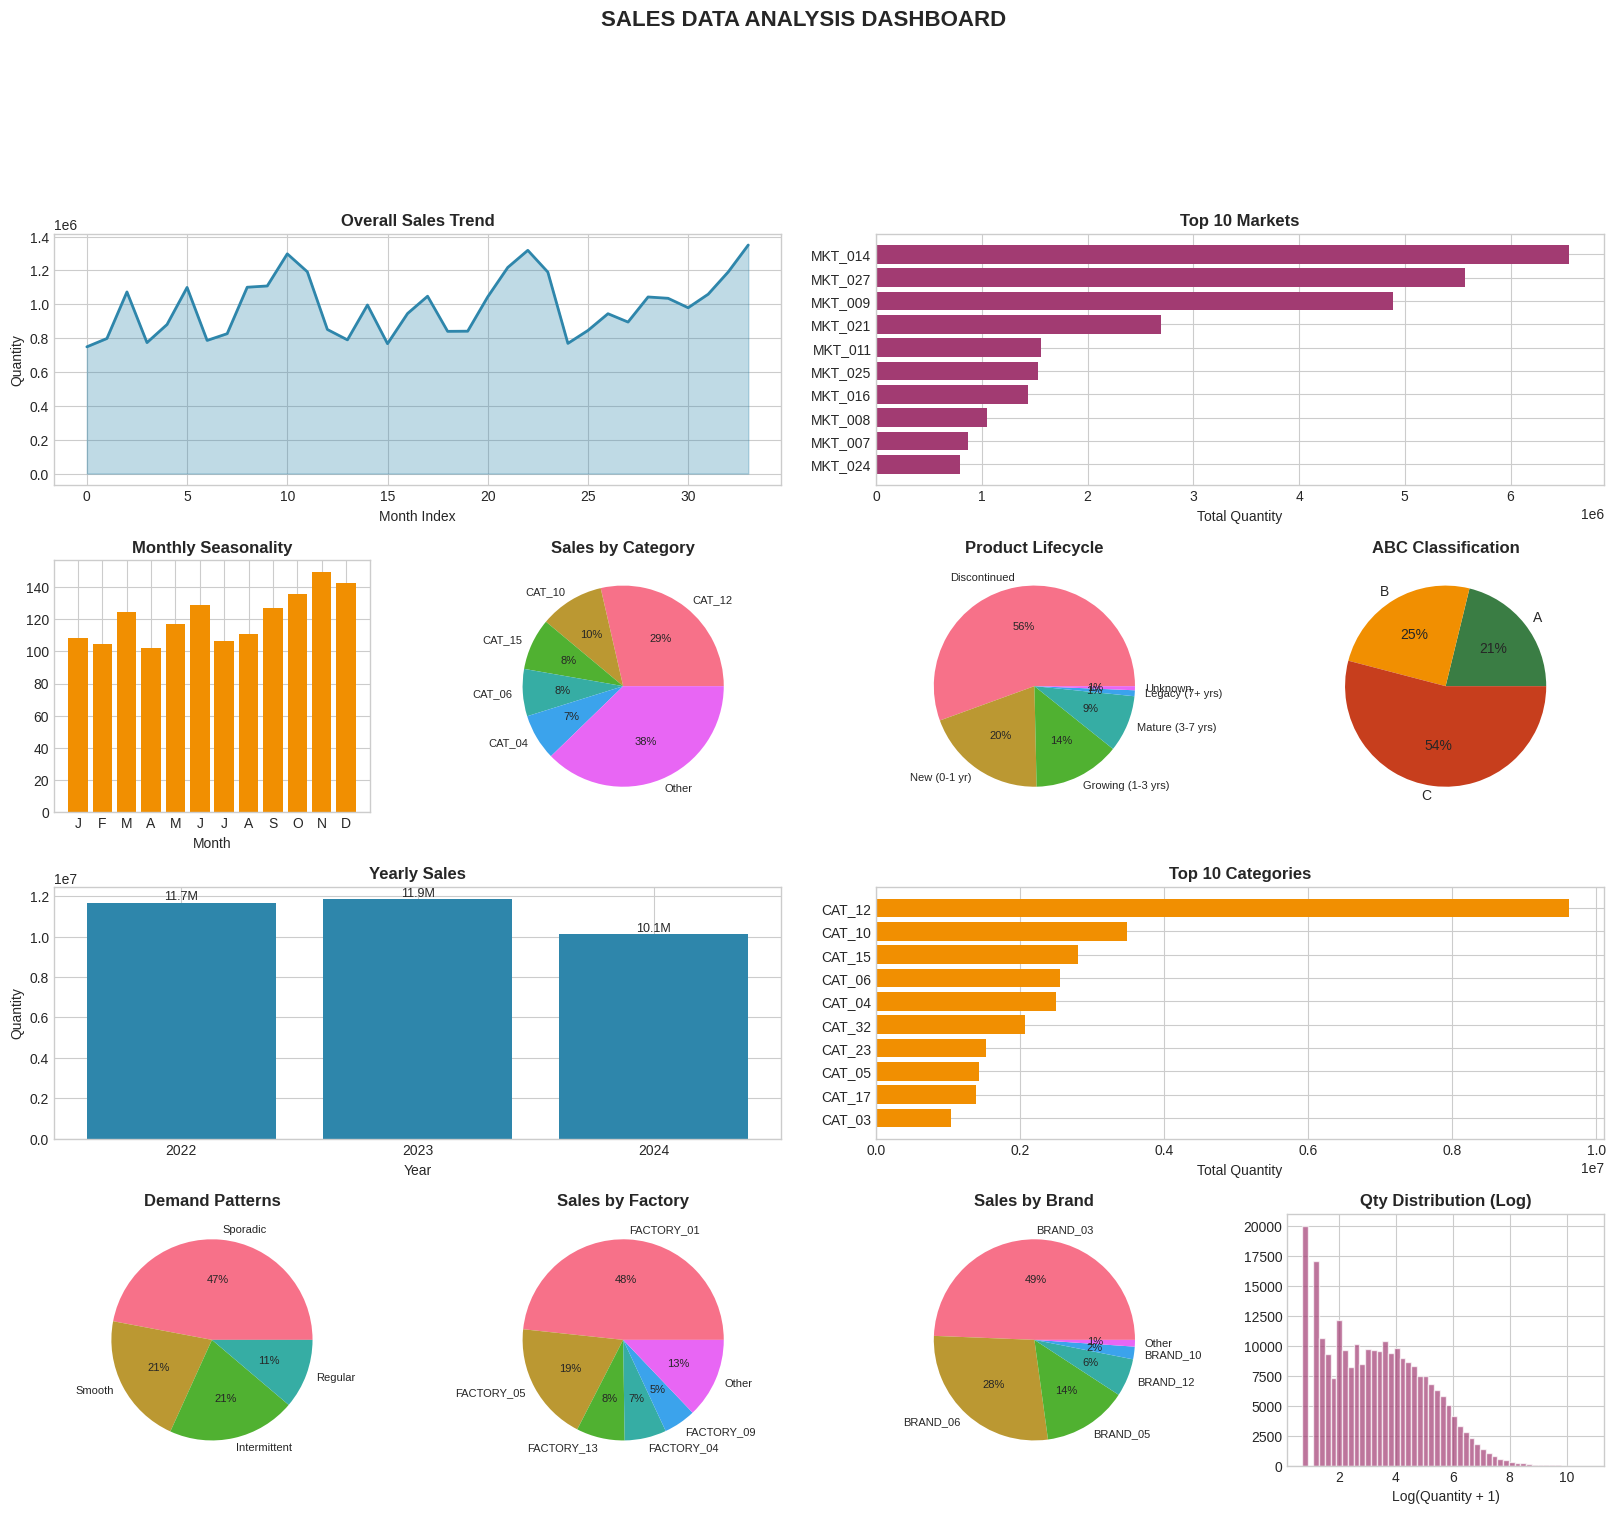


✅ Dashboard saved as 'eda_dashboard.png'


In [243]:
# 11.2 Create Summary Visualizations Dashboard
fig = plt.figure(figsize=(20, 16))

# Define grid
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# 1. Sales Trend (top left, spans 2 columns)
ax1 = fig.add_subplot(gs[0, :2])
monthly_total = df.groupby('year_month')['quantity'].sum()
ax1.plot(range(len(monthly_total)), monthly_total.values, color=COLORS['primary'], linewidth=2)
ax1.fill_between(range(len(monthly_total)), monthly_total.values, alpha=0.3, color=COLORS['primary'])
ax1.set_title('Overall Sales Trend', fontsize=12, fontweight='bold')
ax1.set_xlabel('Month Index')
ax1.set_ylabel('Quantity')

# 2. Top 10 Markets (top right, spans 2 columns)
ax2 = fig.add_subplot(gs[0, 2:])
top_10_markets = market_summary.head(10)
ax2.barh(top_10_markets.index[::-1], top_10_markets['Total Qty'][::-1], color=COLORS['secondary'])
ax2.set_title('Top 10 Markets', fontsize=12, fontweight='bold')
ax2.set_xlabel('Total Quantity')

# 3. Monthly Seasonality
ax3 = fig.add_subplot(gs[1, 0])
monthly_pattern = df.groupby('month')['quantity'].mean()
ax3.bar(monthly_pattern.index, monthly_pattern.values, color=COLORS['tertiary'])
ax3.set_title('Monthly Seasonality', fontsize=12, fontweight='bold')
ax3.set_xlabel('Month')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])

# 4. Category Distribution
ax4 = fig.add_subplot(gs[1, 1])
top_5_cat = category_summary.head(5)['Total Qty']
other_cat = category_summary.iloc[5:]['Total Qty'].sum()
cat_pie_data = pd.concat([top_5_cat, pd.Series({'Other': other_cat})])
ax4.pie(cat_pie_data, labels=cat_pie_data.index, autopct='%1.0f%%', textprops={'fontsize': 8})
ax4.set_title('Sales by Category', fontsize=12, fontweight='bold')

# 5. Product Lifecycle
ax5 = fig.add_subplot(gs[1, 2])
lifecycle_counts = product_master['lifecycle_stage'].value_counts()
ax5.pie(lifecycle_counts, labels=lifecycle_counts.index, autopct='%1.0f%%', textprops={'fontsize': 8})
ax5.set_title('Product Lifecycle', fontsize=12, fontweight='bold')

# 6. ABC Classification
ax6 = fig.add_subplot(gs[1, 3])
ax6.pie(abc_summary['SKU Count'], labels=abc_summary.index, autopct='%1.0f%%',
       colors=[colors_abc[x] for x in abc_summary.index])
ax6.set_title('ABC Classification', fontsize=12, fontweight='bold')

# 7. Year-over-Year Trend (bottom, spans 2 columns)
ax7 = fig.add_subplot(gs[2, :2])
yearly_sales = df.groupby('year')['quantity'].sum()
ax7.bar(yearly_sales.index.astype(str), yearly_sales.values, color=COLORS['primary'])
ax7.set_title('Yearly Sales', fontsize=12, fontweight='bold')
ax7.set_xlabel('Year')
ax7.set_ylabel('Quantity')
for i, (year, val) in enumerate(yearly_sales.items()):
    ax7.text(i, val, f'{val/1e6:.1f}M', ha='center', va='bottom', fontsize=9)

# 8. Top 10 Categories
ax8 = fig.add_subplot(gs[2, 2:])
top_10_cat = category_summary.head(10)
ax8.barh(top_10_cat.index[::-1], top_10_cat['Total Qty'][::-1], color=COLORS['tertiary'])
ax8.set_title('Top 10 Categories', fontsize=12, fontweight='bold')
ax8.set_xlabel('Total Quantity')

# 9. Demand Pattern Distribution
ax9 = fig.add_subplot(gs[3, 0])
demand_counts = sku_activity['Demand Pattern'].value_counts()
ax9.pie(demand_counts, labels=demand_counts.index, autopct='%1.0f%%', textprops={'fontsize': 8})
ax9.set_title('Demand Patterns', fontsize=12, fontweight='bold')

# 10. Factory Distribution
ax10 = fig.add_subplot(gs[3, 1])
top_5_factory = factory_summary.head(5)['Total Qty']
other_factory = factory_summary.iloc[5:]['Total Qty'].sum()
factory_pie_data = pd.concat([top_5_factory, pd.Series({'Other': other_factory})])
ax10.pie(factory_pie_data, labels=factory_pie_data.index, autopct='%1.0f%%', textprops={'fontsize': 8})
ax10.set_title('Sales by Factory', fontsize=12, fontweight='bold')

# 11. Brand Distribution
ax11 = fig.add_subplot(gs[3, 2])
top_5_brand = brand_summary.head(5)['Total Qty']
other_brand = brand_summary.iloc[5:]['Total Qty'].sum()
brand_pie_data = pd.concat([top_5_brand, pd.Series({'Other': other_brand})])
ax11.pie(brand_pie_data, labels=brand_pie_data.index, autopct='%1.0f%%', textprops={'fontsize': 8})
ax11.set_title('Sales by Brand', fontsize=12, fontweight='bold')

# 12. Quantity Distribution
ax12 = fig.add_subplot(gs[3, 3])
ax12.hist(np.log1p(df[df['quantity'] > 0]['quantity']), bins=50, 
          color=COLORS['secondary'], edgecolor='white', alpha=0.7)
ax12.set_title('Qty Distribution (Log)', fontsize=12, fontweight='bold')
ax12.set_xlabel('Log(Quantity + 1)')

plt.suptitle('SALES DATA ANALYSIS DASHBOARD', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('visualizations/eda_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Dashboard saved as 'eda_dashboard.png'")


In [244]:

# 11.3 Recommendations for Forecasting
print("\n" + "=" * 80)
print("🎯 RECOMMENDATIONS FOR FORECASTING MODEL")
print("=" * 80)

print("""
📌 KEY FINDINGS & RECOMMENDATIONS:

1. SEASONALITY HANDLING:
   • Strong monthly seasonality detected - include month as a feature
   • Consider Fourier terms for capturing seasonal patterns
   • Different categories show different seasonal patterns - consider hierarchical models

2. MARKET SEGMENTATION:
   • Significant variation across markets - market should be a key feature
   • Consider separate models for top markets vs. aggregated model for smaller markets
   • Market-specific seasonality patterns exist

3. PRODUCT LIFECYCLE:
   • New products have limited history - consider cold-start strategies
   • Discontinued products should be excluded from future forecasts
   • Product age is correlated with sales patterns

4. HIERARCHY STRUCTURE:
   • Use hierarchical reconciliation for consistent forecasts
   • Aggregate forecasts may be more stable than SKU-level
   • Consider bottom-up, top-down, or middle-out approaches

5. DEMAND PATTERNS:
   • High proportion of intermittent demand - consider specialized methods
   • Croston's method or ADIDA for sporadic SKUs
   • Zero-inflated models may be appropriate

6. DATA QUALITY:
   • Handle missing months as zero sales
   • Consider imputation strategies for sparse data
   • Validate product codes against master data

7. FEATURE ENGINEERING SUGGESTIONS:
   • Lag features (1, 3, 6, 12 months)
   • Rolling statistics (mean, std, min, max)
   • Year-over-year growth rates
   • Product age at time of sale
   • Market penetration metrics
   • Category-level aggregates
   • Seasonal indices by category/market
""")



🎯 RECOMMENDATIONS FOR FORECASTING MODEL

📌 KEY FINDINGS & RECOMMENDATIONS:

1. SEASONALITY HANDLING:
   • Strong monthly seasonality detected - include month as a feature
   • Consider Fourier terms for capturing seasonal patterns
   • Different categories show different seasonal patterns - consider hierarchical models

2. MARKET SEGMENTATION:
   • Significant variation across markets - market should be a key feature
   • Consider separate models for top markets vs. aggregated model for smaller markets
   • Market-specific seasonality patterns exist

3. PRODUCT LIFECYCLE:
   • New products have limited history - consider cold-start strategies
   • Discontinued products should be excluded from future forecasts
   • Product age is correlated with sales patterns

4. HIERARCHY STRUCTURE:
   • Use hierarchical reconciliation for consistent forecasts
   • Aggregate forecasts may be more stable than SKU-level
   • Consider bottom-up, top-down, or middle-out approaches

5. DEMAND PATTERNS:
  

In [245]:
# 11.4 Export Summary Tables
# Create summary dataframes for export

# Market Summary
market_export = market_summary.copy()
market_export.to_csv('summaries/eda_market_summary.csv')

# Category Summary
category_export = category_summary.copy()
category_export.to_csv('eda_category_summary.csv')

# SKU ABC Classification
sku_abc.to_csv('summaries/eda_sku_abc_classification.csv', index=False)

# Product Lifecycle
lifecycle_export = product_master[['product_code', 'category', 'brand', 'factory', 
                                    'start_production_date', 'end_production_date',
                                    'product_age_years', 'is_active', 'lifecycle_stage']].copy()
lifecycle_export.to_csv('summaries/eda_product_lifecycle.csv', index=False)

print("✅ Summary tables exported:")
print("   • eda_market_summary.csv")
print("   • eda_category_summary.csv")
print("   • eda_sku_abc_classification.csv")
print("   • eda_product_lifecycle.csv")


✅ Summary tables exported:
   • eda_market_summary.csv
   • eda_category_summary.csv
   • eda_sku_abc_classification.csv
   • eda_product_lifecycle.csv
